In [ ]:
import os
import seaborn as sns
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/imdb/IMDB-Movie-Data.csv')
pd.set_option('display.max_columns',20)

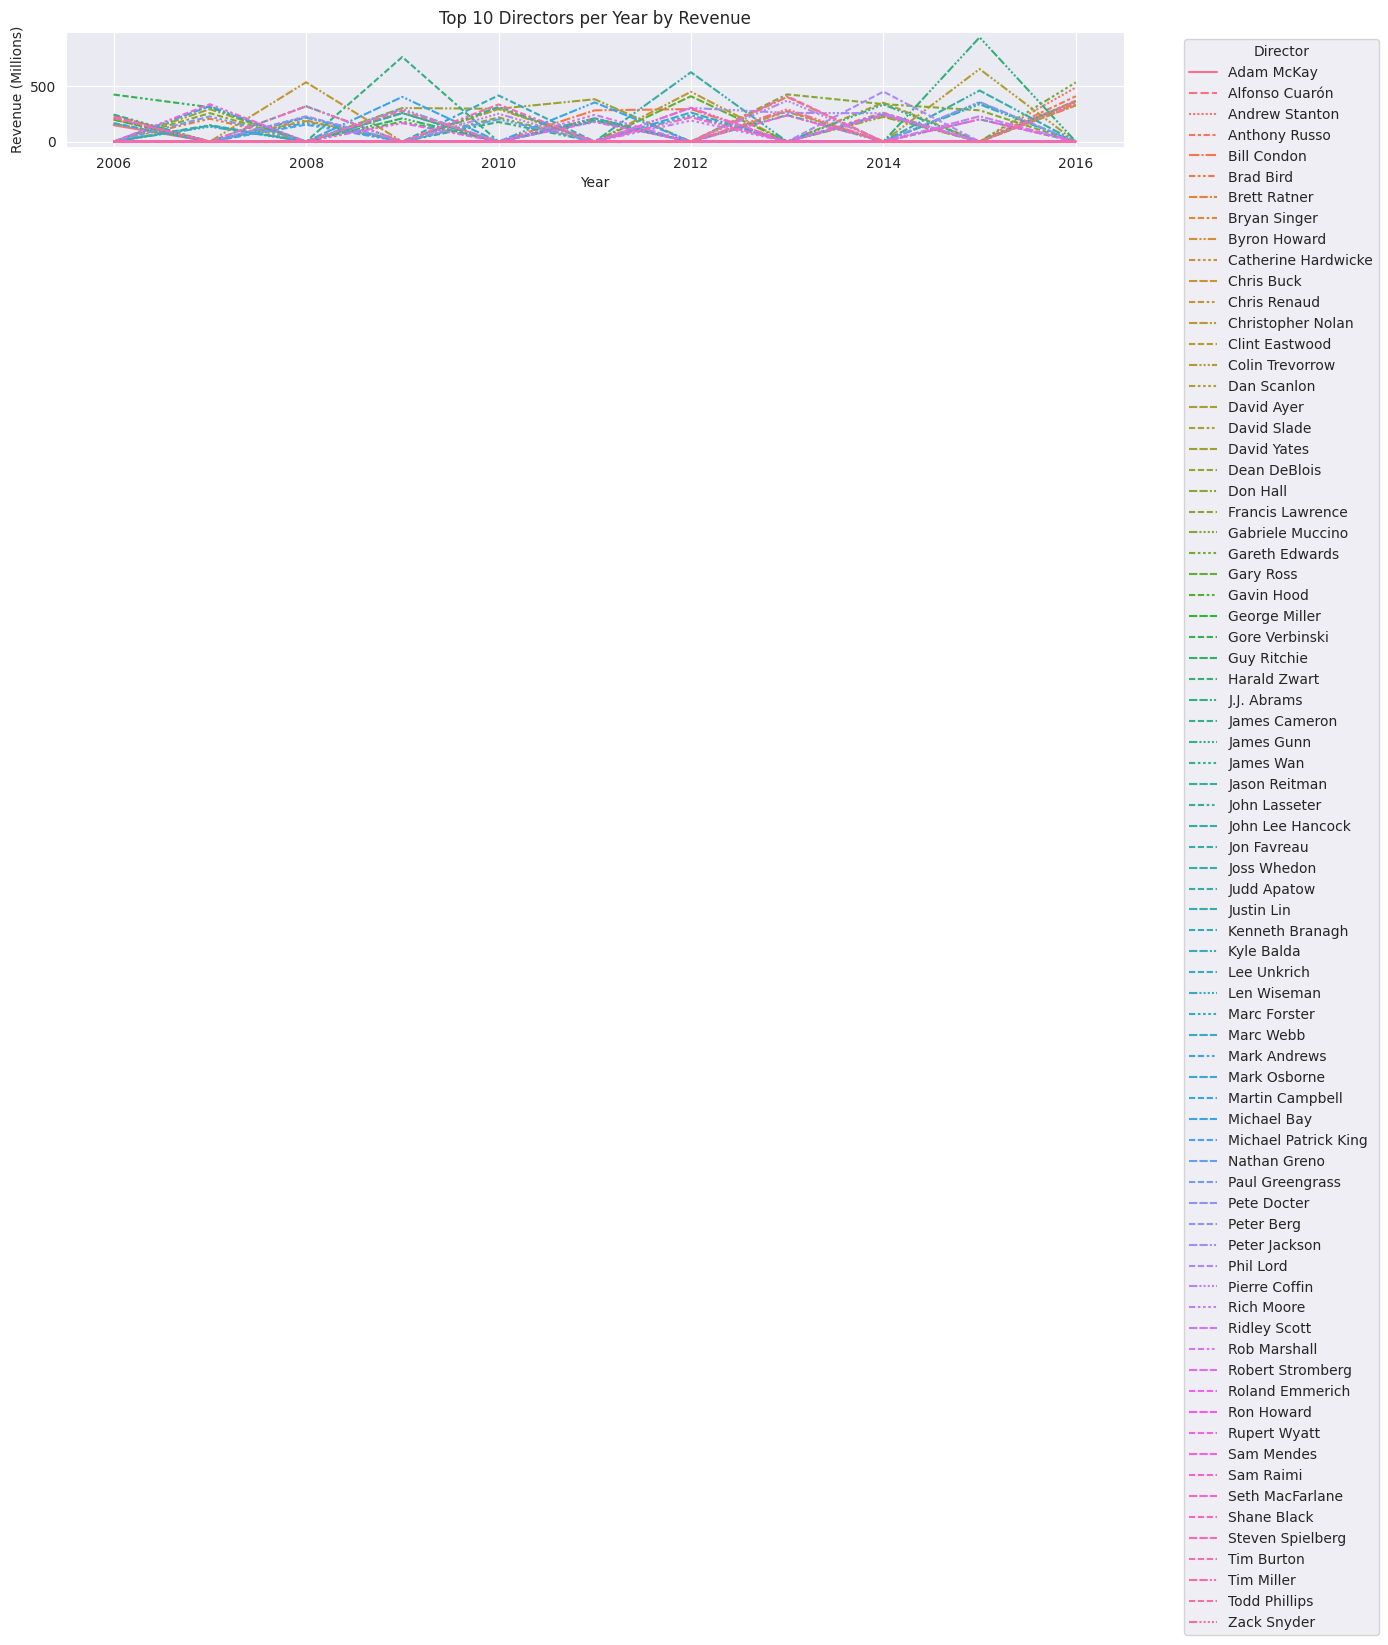

In [ ]:
director_revenue_per_year = data.groupby(['Year', 'Director'])['Revenue (Millions)'].sum().reset_index()

# Find the top 10 directors per year based on Revenue
top_directors_per_year = director_revenue_per_year.groupby('Year').apply(lambda x: x.nlargest(10, 'Revenue (Millions)')).reset_index(drop=True)

# Get a list of all unique top directors across all years
top_directors = top_directors_per_year['Director'].unique()

# Create a comprehensive DataFrame with all years and all top directors
years = top_directors_per_year['Year'].unique()
full_index = pd.MultiIndex.from_product([years, top_directors], names=['Year', 'Director'])
comprehensive_df = pd.DataFrame(index=full_index).reset_index()

# Merge the comprehensive DataFrame with the top directors per year data
comprehensive_df = comprehensive_df.merge(top_directors_per_year, on=['Year', 'Director'], how='left')

# Fill missing revenue data with 0
comprehensive_df['Revenue (Millions)'] = comprehensive_df['Revenue (Millions)'].fillna(0)

# Create a pivot table for plotting
pivot_data = comprehensive_df.pivot(index='Year', columns='Director', values='Revenue (Millions)')

# Plot the data
plt.figure(figsize=(14, 10))
sns.lineplot(data=pivot_data)

# Customize the plot
plt.title('Top 10 Directors per Year by Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

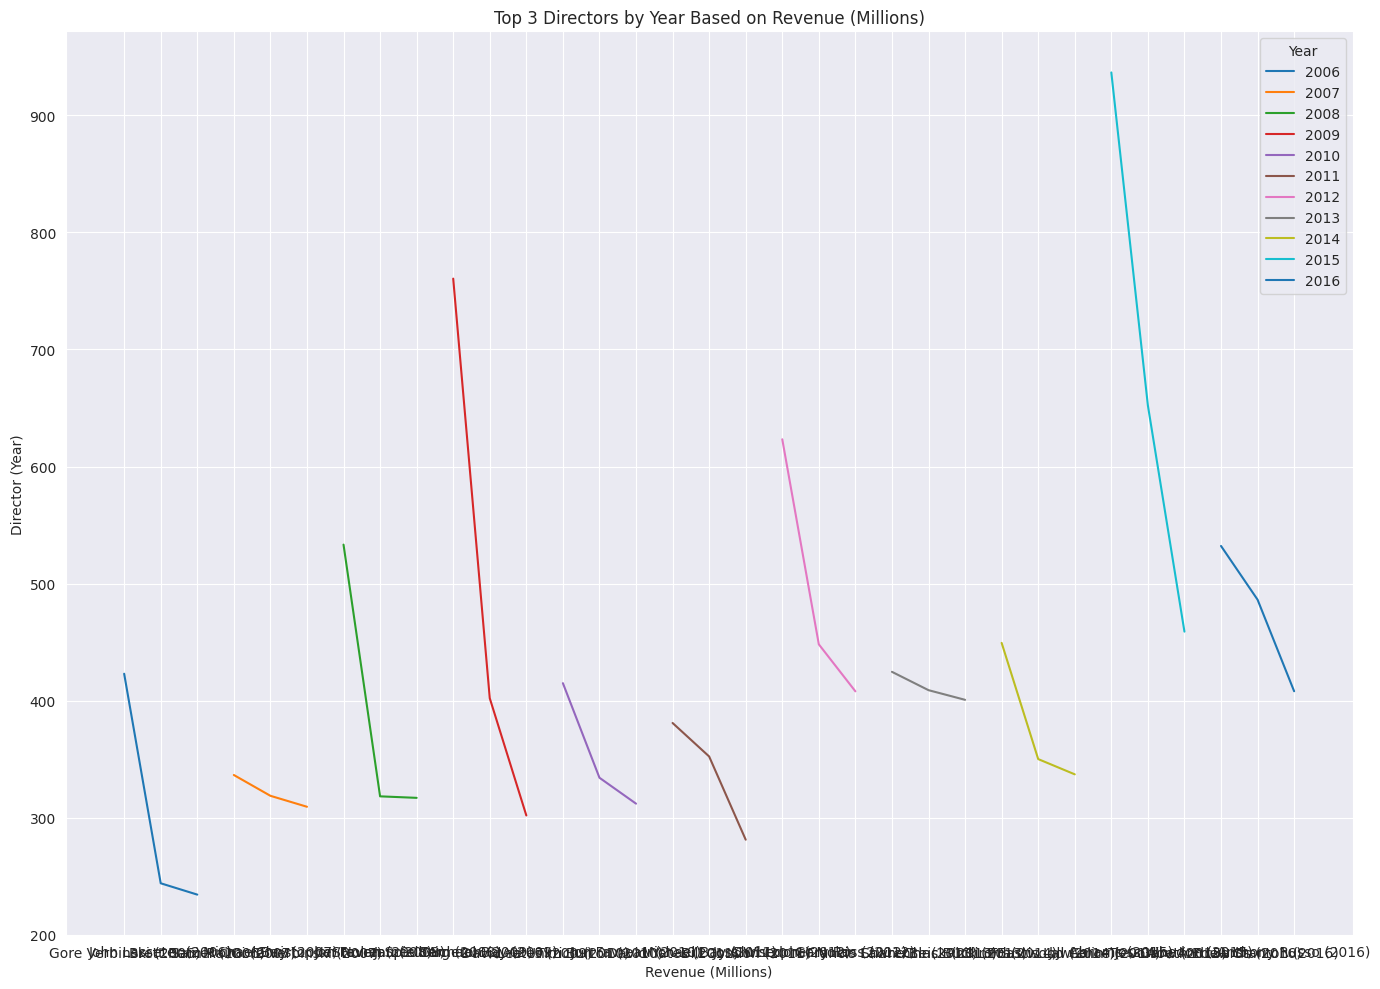

In [ ]:
grouped = data.groupby(['Year', 'Director'])['Revenue (Millions)'].sum().reset_index()

# Sort the data by Year and Revenue
grouped = grouped.sort_values(['Year', 'Revenue (Millions)'], ascending=[True, False])

# Get the top 3 directors per year
top_3_directors = grouped.groupby('Year').head(3).reset_index(drop=True)

# Plot the data
plt.figure(figsize=(14, 10))
for year in top_3_directors['Year'].unique():
    subset = top_3_directors[top_3_directors['Year'] == year]
    plt.plot(subset['Director'] + ' (' + subset['Year'].astype(str) + ')', subset['Revenue (Millions)'], label=year)

plt.xlabel('Revenue (Millions)')
plt.ylabel('Director (Year)')
plt.title('Top 3 Directors by Year Based on Revenue (Millions)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

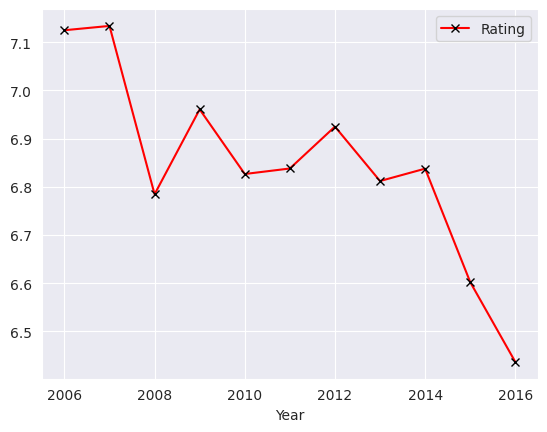

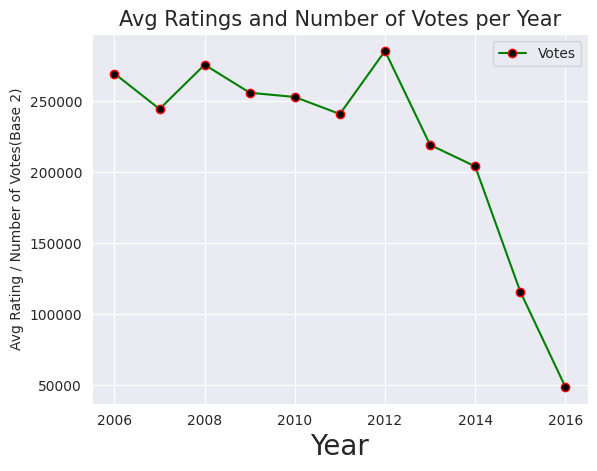

In [ ]:


plt.figure(figsize = (15,10))
data.groupby("Year")[['Rating']].mean().plot(kind = "line" , marker = "x" , color = "r" , mec = "black" , mfc = "white")
data.groupby("Year")[['Votes']].mean().plot(kind = "line" , marker = "o" , color = "g" , mec = "r" , mfc = "black")
plt.legend()
plt.xlabel("Year",fontsize = 20)
plt.title("Avg Ratings and Number of Votes per Year",fontsize = 15)
plt.ylabel("Avg Rating / Number of Votes(Base 2)",fontsize = 10)
plt.show()


In [ ]:
display(data)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [ ]:

display(D.groupby('Year').sort_values())

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

<Axes: xlabel='Year,Director'>

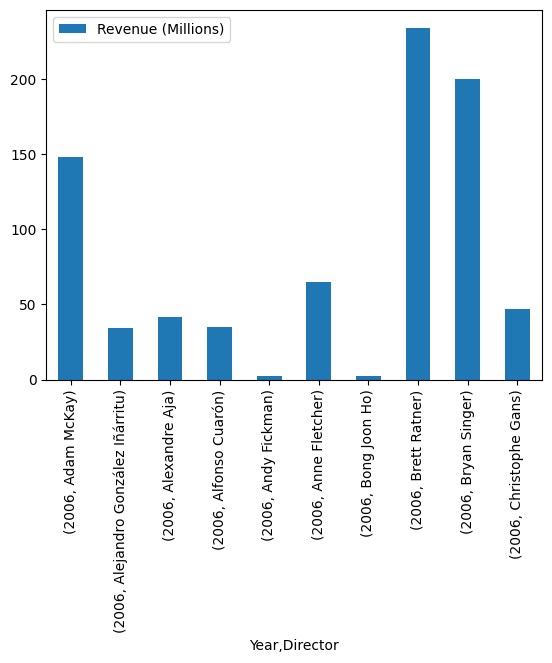

In [ ]:
D =pd.DataFrame(data.groupby(['Year','Director'])['Revenue (Millions)'].mean())
display(D.head(10).plot(kind='bar'))


<ipython-input-117-13608f159b55>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


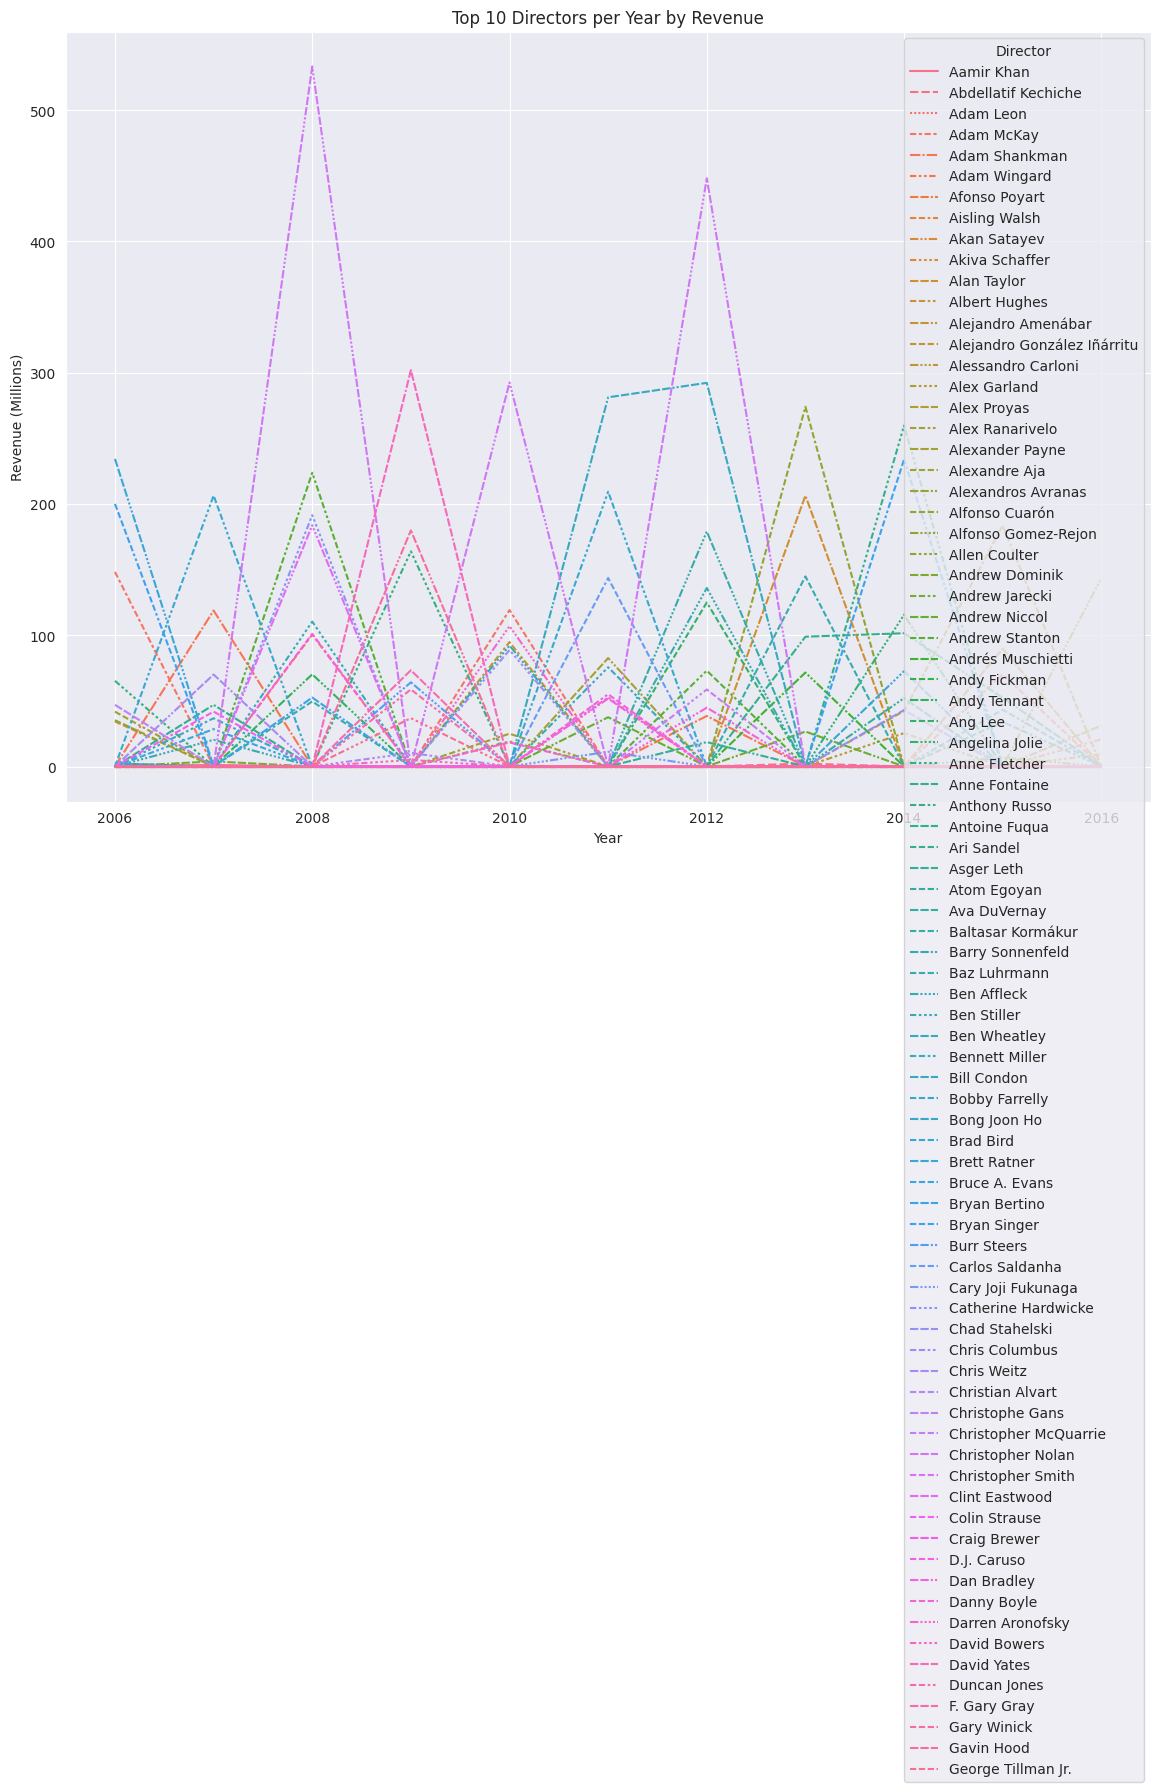

In [ ]:
director_revenue_per_year = data.groupby(['Year', 'Director'])['Revenue (Millions)'].sum().reset_index()

# Find the top 10 directors per year based on Revenue
top_directors_per_year = director_revenue_per_year.groupby('Year').head(10)

# Create a pivot table for plotting
pivot_data = top_directors_per_year.pivot_table(index='Year', columns='Director', values='Revenue (Millions)', fill_value=0)

# Plot the data
plt.figure(figsize=(14, 10))
sns.lineplot(data=pivot_data)

# Customize the plot
plt.title('Top 10 Directors per Year by Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.legend([])
plt.tight_layout()
plt.show()




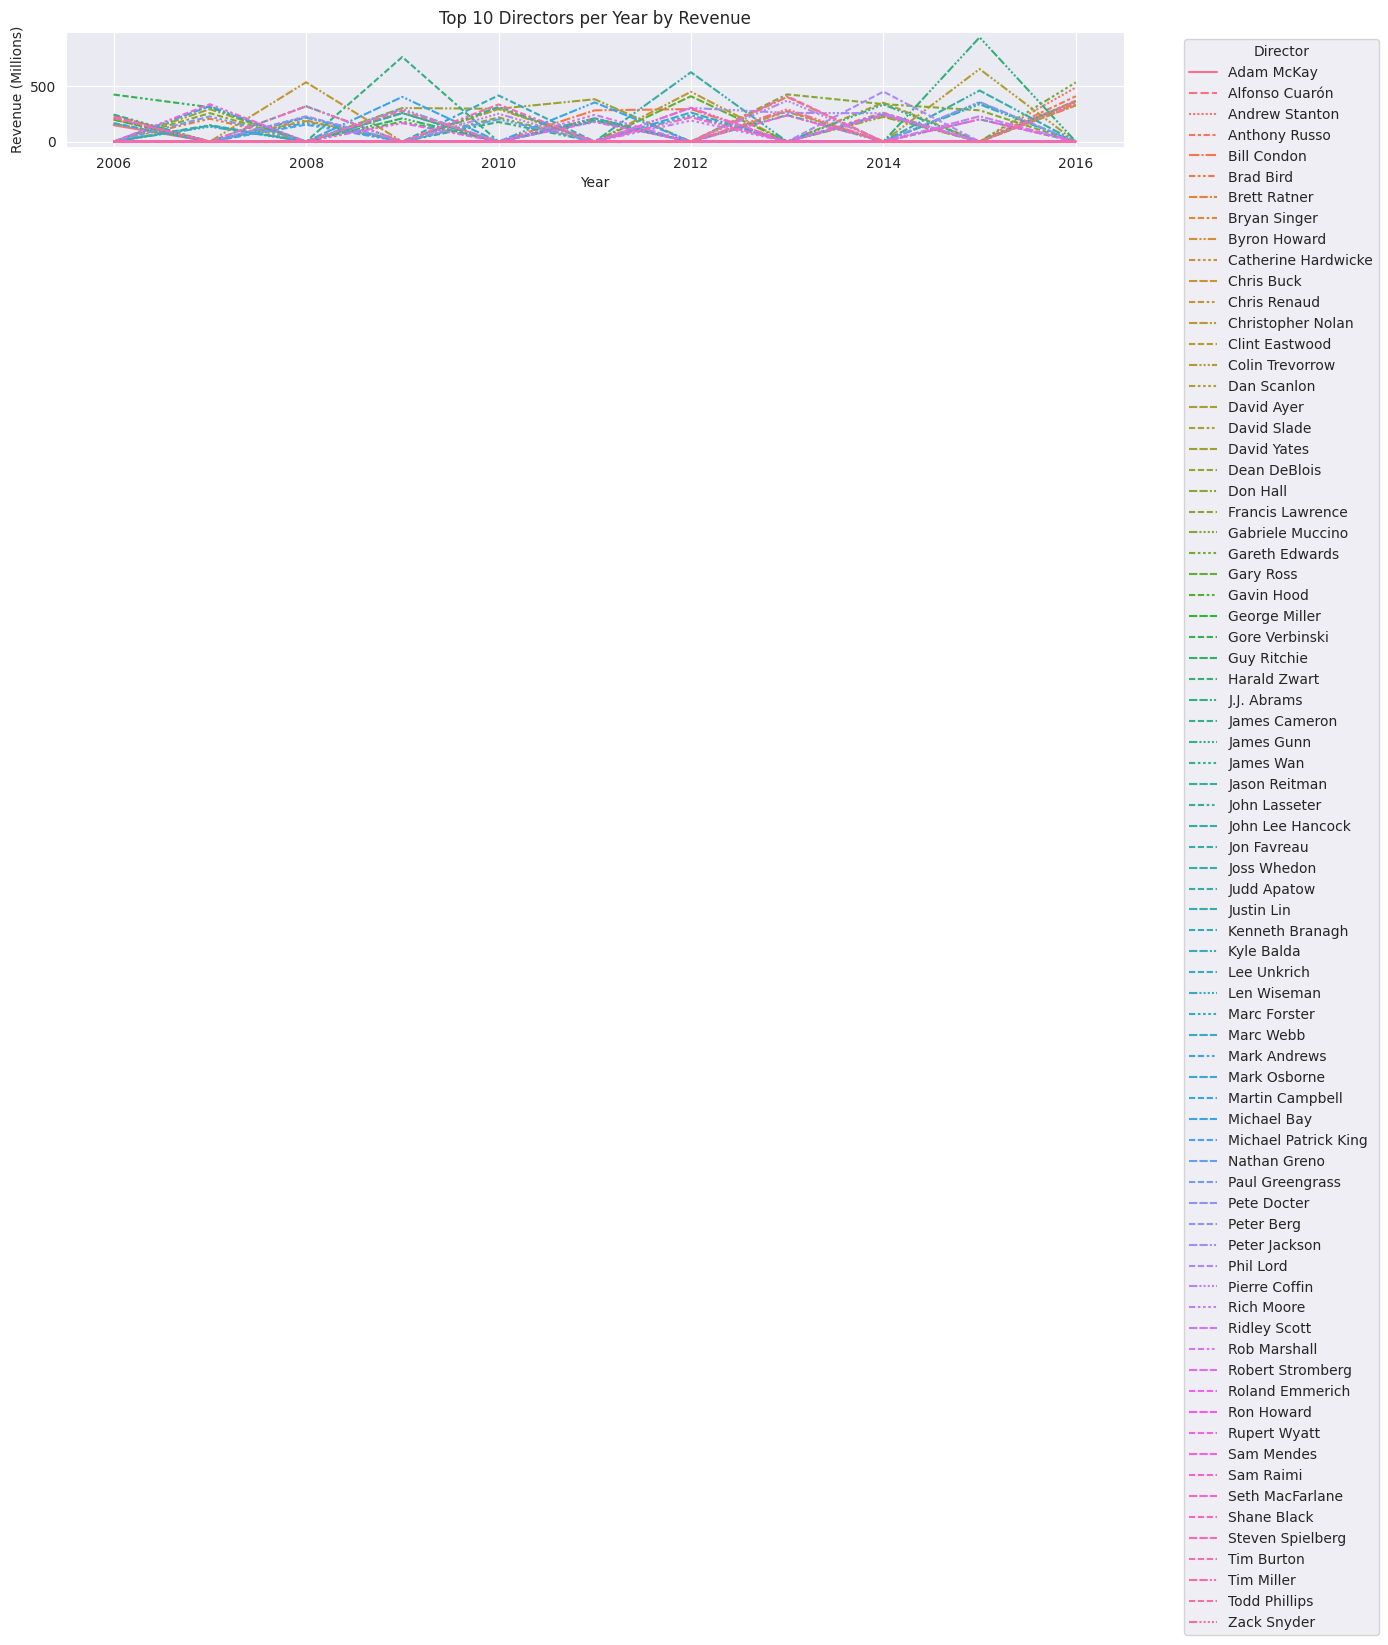

In [ ]:
# Top Directors and Actors: Analyze the performance (average rating, revenue, and metascore) total and per year
# find how the films perfom based on directors and actors?
# Director-Genre Interaction: top directors in differnt genres

# how diversified are the directors ,do they make films one genre the most or in different genres

# Movie Segmentation: Use clustering techniques like K-means to segment movies into different clusters based on their attributes (rating, votes, revenue, runtime, metascore) and analyze each cluster.



In [ ]:
#     High Revenue Factors: Identify the factors that contribute to high revenue movies by analyzing correlations with rating, votes, metascore, and runtime.
#     Top Revenue Movies: List the movies with the highest revenue and analyze their common characteristics.

# Description Analysis: Perform sentiment analysis on the 'Description' column to see if there's a correlation between the sentiment of a movie's description and its rating or revenue.

# : Compare high-budget blockbusters with low-budget movies in terms of rating, revenue, and metascore.

# Preliminery analysis

---

# 1. Display Top 10 Rows of The Dataset

In [ ]:
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


# 2. Check Last 10 Rows of The Dataset

In [ ]:
data.tail(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(872, 14)

In [ ]:
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of Rows 1000
Number of Columns 12


# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()


# 5. Check Null Values In The Dataset

In [ ]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

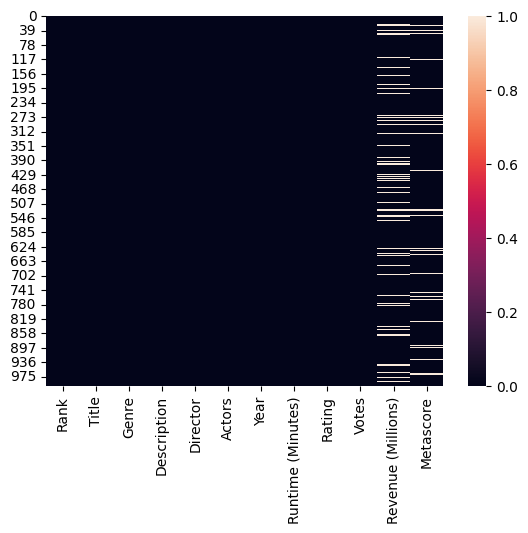

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

# 6. Drop All The Missing Values



In [ ]:
# data = data.dropna(axis=0)

In [ ]:
# sns.heatmap(data.isnull())
# plt.show()

# 7. Check For Duplicate Data

In [ ]:
dup_data=data.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

Are there any duplicated values in data? False


# 8. Get Overall Statistics About The DataFrame

In [ ]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# 9. Display Title of The Movie Having Runtime >= 180 Minutes

In [ ]:
data[data['Runtime (Minutes)']>=181]['Title']

88     The Hateful Eight
828           Grindhouse
Name: Title, dtype: object

# 10. In Which Year There Was The Highest Voting?

In [ ]:
sns.barplot(x='Year',y='Votes',data=data)
plt.title("Votes By Year")
plt.show()

# 11. In Which Year There Was The Highest Revenue?

In [ ]:
sns.barplot(x='Year',y='Revenue (Millions)',data=data)
plt.title("Revenue By Year")
plt.show()

# 12. Find The Average Rating For Each Director

In [ ]:
l=data.groupby('Director')['Rating'].mean().sort_values(ascending=False)
display(pd.DataFrame(l))

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Aamir Khan,8.50
...,...
Micheal Bafaro,3.50
Jonathan Holbrook,3.20
Shawn Burkett,2.70


In [ ]:
data['Director'].replace(l,inplace=True)

# 13. Display Top 10 Lengthy Movies Title

In [ ]:
le =data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]. \
set_index('Title')
display(le)

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


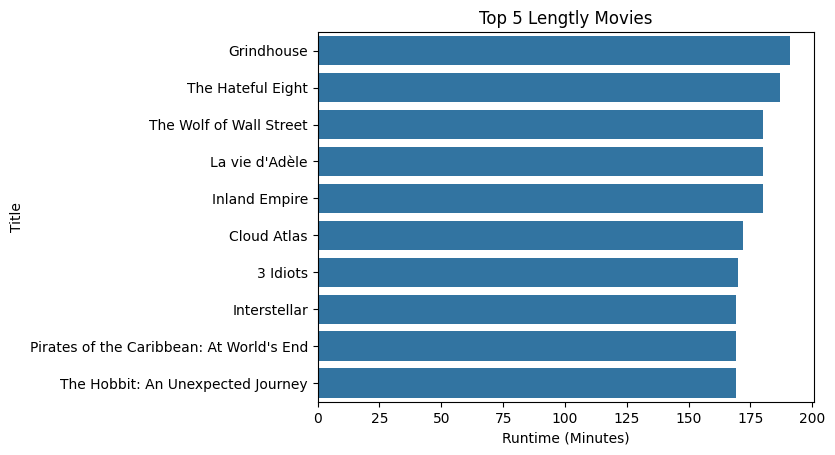

In [ ]:
sns.barplot(x=le['Runtime (Minutes)'],y=le.index,data=le)
plt.title('Top 5 Lengtly Movies')
plt.show()

# 14. Display Number of Movies Per Year

Text(0.5, 1.0, 'Number of Movies Per Year')

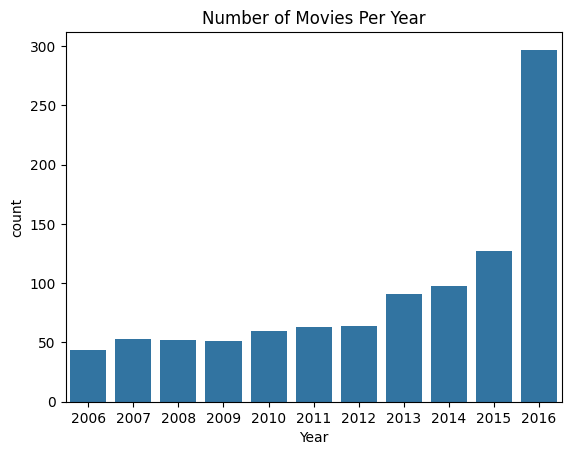

In [ ]:
sns.countplot(x='Year',data=data)
plt.title("Number of Movies Per Year")

# 15. Find Most Popular Movie Title (Higest Revenue)

In [ ]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
data[data['Revenue (Millions)'].max() == data['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

# 16. Display Top 10 Highest Rated Movie Titles And its Directors

In [ ]:
Top_10=data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')

In [ ]:
Top_10

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Dangal,8.8,Nitesh Tiwari
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan


Text(0.5, 1.0, 'Display Top 10 Highest Rated Movie Titles')

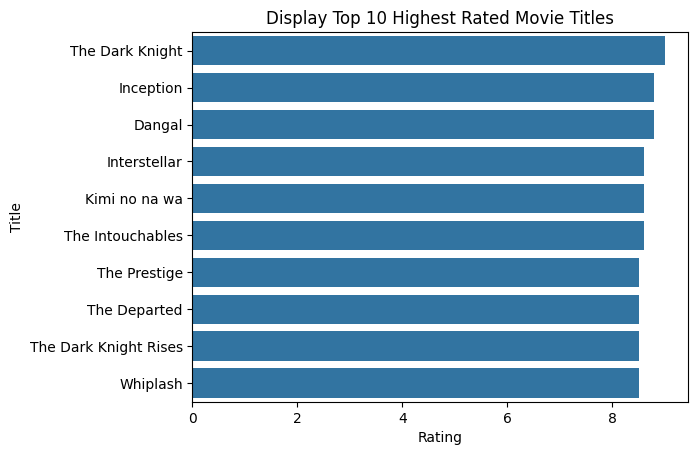

In [ ]:
sns.barplot(x=Top_10['Rating'],y=Top_10.index,data=Top_10)
plt.title("Display Top 10 Highest Rated Movie Titles")

# 17. Display Top 10 Highest Revenue Movie Titles

In [ ]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
data.sort_values(by='Revenue (Millions)',ascending=False).head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


In [ ]:
top_10 = data.nlargest(10,'Revenue (Millions)')[['Title','Director','Revenue (Millions)']].set_index('Title')

# 18.  Find Average Rating of Movies Year-wise

In [ ]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
data1 = data.groupby('Year')[['Rating']].mean().sort_values(by='Rating', ascending=False)
data1 = data.groupby('Year')[['votes']].mean().sort_values(by='Votes', ascending=False)


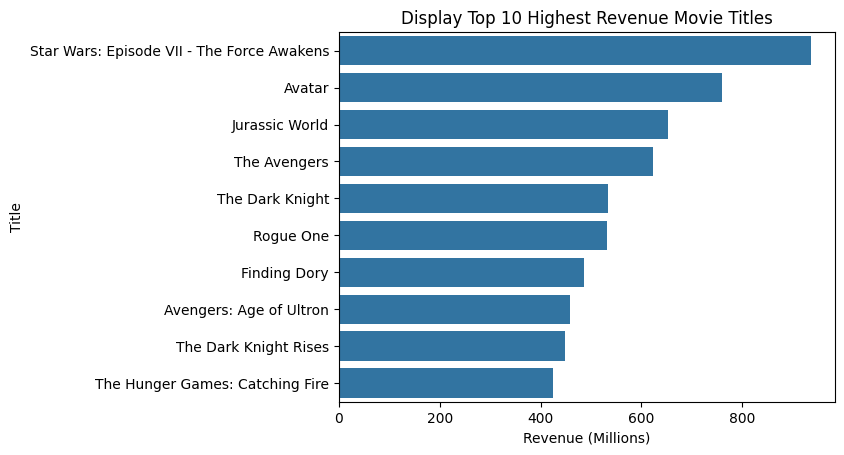

In [ ]:
sns.barplot(x=top_10['Revenue (Millions)'],y=top_10.index,data=top_10)
plt.title("Display Top 10 Highest Revenue Movie Titles")
plt.show()

In [ ]:
data1

,Rating
Year,
2007,7.133962
2006,7.125000
2009,6.960784
2012,6.925000
2011,6.838095
2014,6.837755
2010,6.826667
2013,6.812088
2008,6.784615


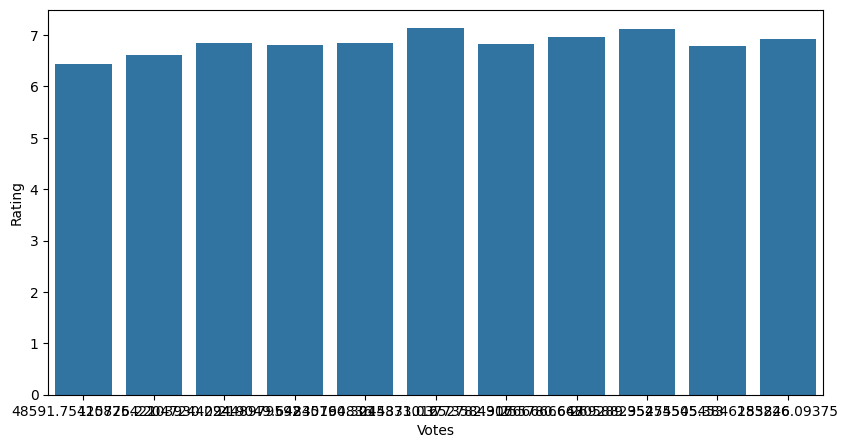

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=data1.index,y=data1['Rating'])
plt.show()

<Figure size 1500x1000 with 0 Axes>

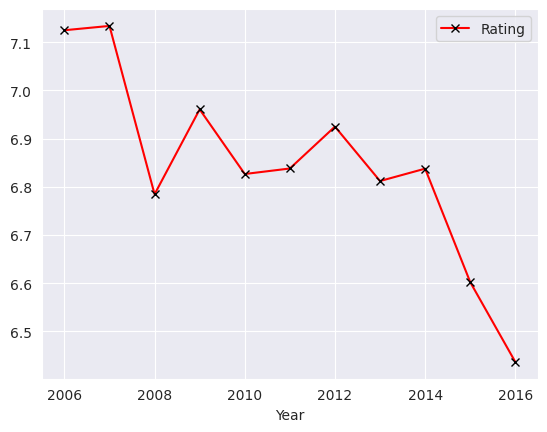

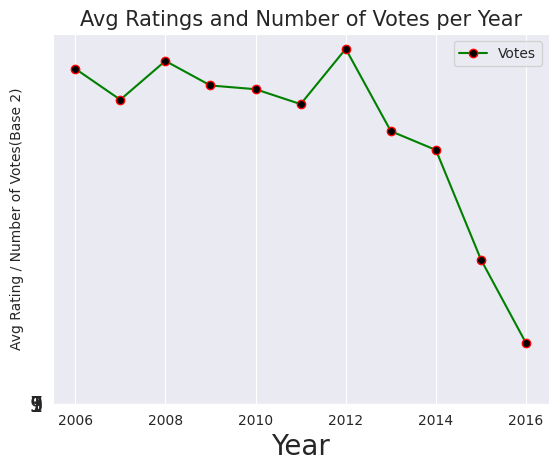

# 19. Does Rating Affect The Revenue?

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

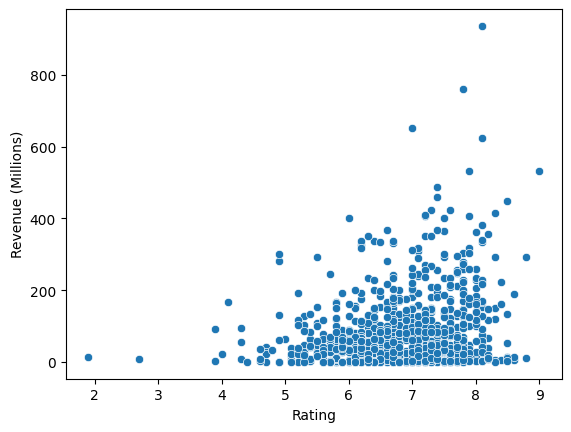

In [ ]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=data)

# Answer : Yes

# 20. Classify Movies Based on Ratings [Good,Better and Best]

In [ ]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
def rating(rating):
    if rating>=7.0:
        return 'Excellent'
    elif rating>=6.0:
        return 'Good'
    else:
        return 'Average'

In [ ]:
data['rating_cat']=data['Rating'].apply(rating)

In [ ]:
data.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent


# 21. Count Number of Action Movies

In [ ]:
list1=[]
for value in data['Genre']:
    list1.append(value.split(','))

In [ ]:
data['temp']=list1

In [ ]:
genre=input("Enter Genre you want to count : ").title()
count=0
for value in data['temp']:
    if genre in value:
        count=count+1
print("Total Count is",count)

KeyboardInterrupt: Interrupted by user

# OR

In [ ]:
len(data[data['Genre'].str.contains('action',case=False)])

303

# 10. My Code




In [ ]:
# @title Examining trends in runtime , revenue ,  metascore and rating
sns.set_style("darkgrid")

metascore = data.groupby('Year')['Metascore'].mean().reset_index()
runtime = data.groupby('Year')['Runtime (Minutes)'].mean().reset_index()
revenue = data.groupby('Year')['Revenue (Millions)'].mean().reset_index()
rating = data.groupby('Year')['Rating'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot average rating per year
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating', color='tab:orange')
sns.lineplot(data=rating, x='Year', y='Rating', ax=ax1, color='tab:orange', label='Rating')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# Plot average revenue per year
ax2 = ax1.twinx()
ax2.set_ylabel('Average Revenue (Millions)', color='tab:red')
sns.lineplot(data=revenue, x='Year', y='Revenue (Millions)', ax=ax2, color='tab:red', label='Revenue (Millions)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Plot average runtime per year
ax3 = ax1.twinx()
sns.lineplot(data=runtime, x='Year', y='Runtime (Minutes)', ax=ax3, color='tab:green', label='Runtime (Minutes)')
ax3.set_yticks([])
ax3.set_ylabel([])

# Plot average metascore per year
ax4 = ax1.twinx()
sns.lineplot(data=metascore, x='Year', y='Metascore',markers=True, dashes=False, ax=ax4, color='tab:blue', label='Metascore')
ax4.set_yticks([])
ax4.set_ylabel([])
# Adding legends for each line
sns.move_legend(ax4,'upper left')

fig.tight_layout()
plt.show()


In [ ]:
# @title info

def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  desc['unique'] = df.nunique()
  desc = pd.concat([desc,df.describe().T],axis=1)
  display(desc)
describe(data)


,dtype,null,%null,unique,count,mean,std,min,25%,50%,75%,max
Rank,int64,0,0.0,1000,1000.0,500.500000,288.819436,1.0,250.75,500.500,750.250,1000.00
Title,object,0,0.0,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,object,0,0.0,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,object,0,0.0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director,object,0,0.0,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actors,object,0,0.0,996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,int64,0,0.0,11,1000.0,2012.783000,3.205962,2006.0,2010.00,2014.000,2016.000,2016.00
Runtime (Minutes),int64,0,0.0,94,1000.0,113.172000,18.810908,66.0,100.00,111.000,123.000,191.00
Rating,float64,0,0.0,55,1000.0,6.723200,0.945429,1.9,6.20,6.800,7.400,9.00
Votes,int64,0,0.0,997,1000.0,169808.255000,188762.647518,61.0,36309.00,110799.000,239909.750,1791916.00


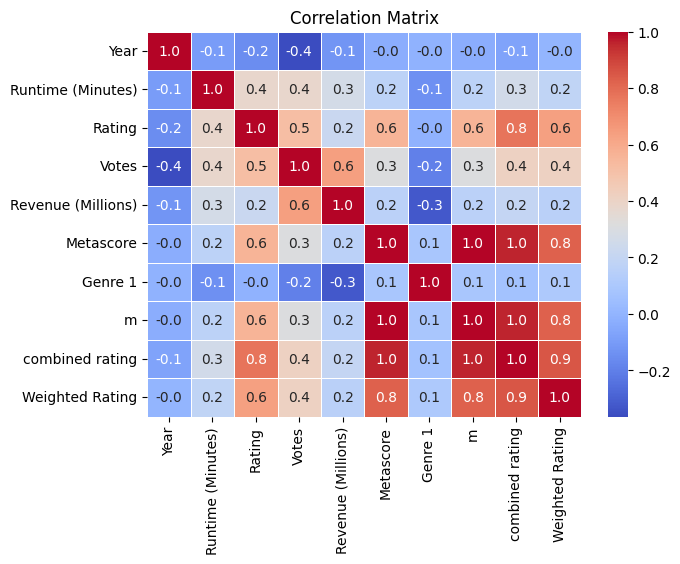

In [ ]:
  # @title Correlation Graph

# Calculate the correlation matrix for numerical columns
correlation_matrix = data.select_dtypes(exclude=['object']).corr()

# Set the size of the figure for better visualization
plt.figure(figsize=(7, 5))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

In [ ]:
# k = data[((data['Revenue (Millions)'].isnull()) | (data['Revenue (Millions)'] == 0)) & (data['Metascore'].isnull())].count()
# print(k)

In [ ]:
# @title finding categorical & continous feature
def cat_fea(train):


  unique_counts = train.nunique()
  #Threshold to distinguish continous and categorical
  threshold = 12
  continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
  categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
  return continuous_vars,categorical_vars


cont,cat=cat_fea(data.select_dtypes(exclude=['object']))


In [ ]:
# display(data[(data['Revenue (Millions)'] > 200) & (data['Revenue (Millions)'] < 300)].count())

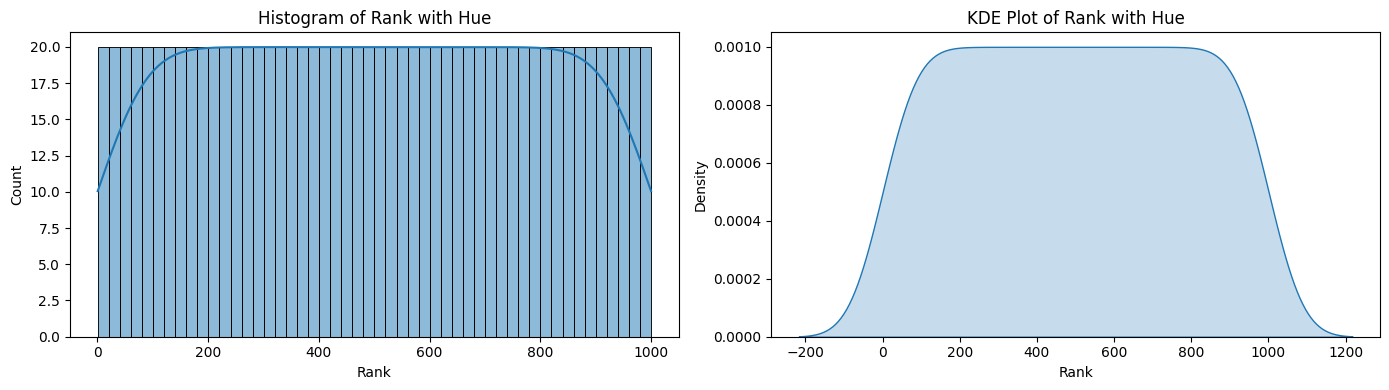

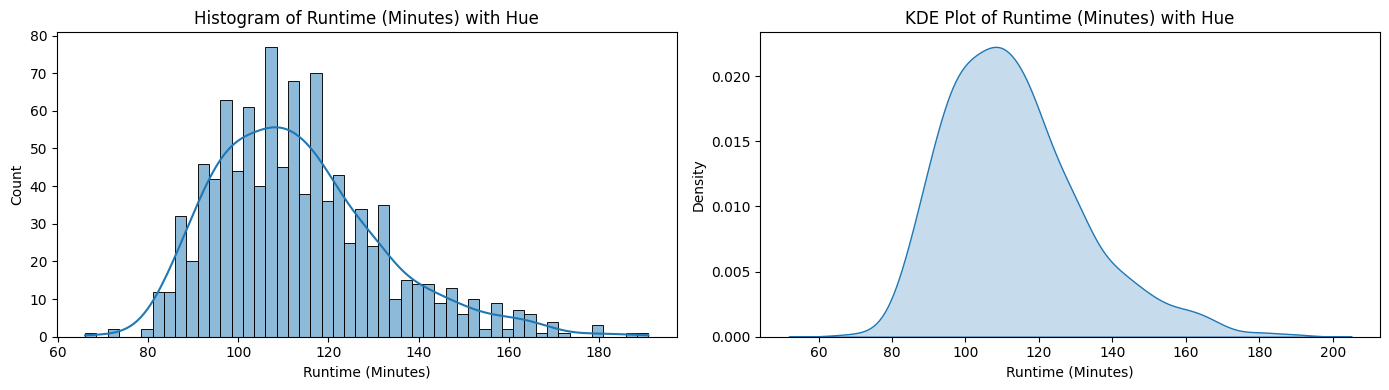

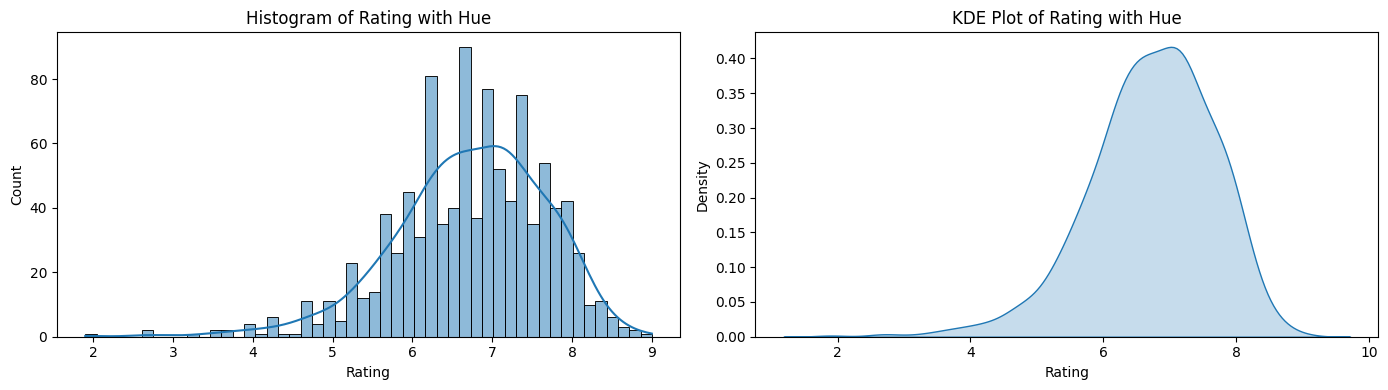

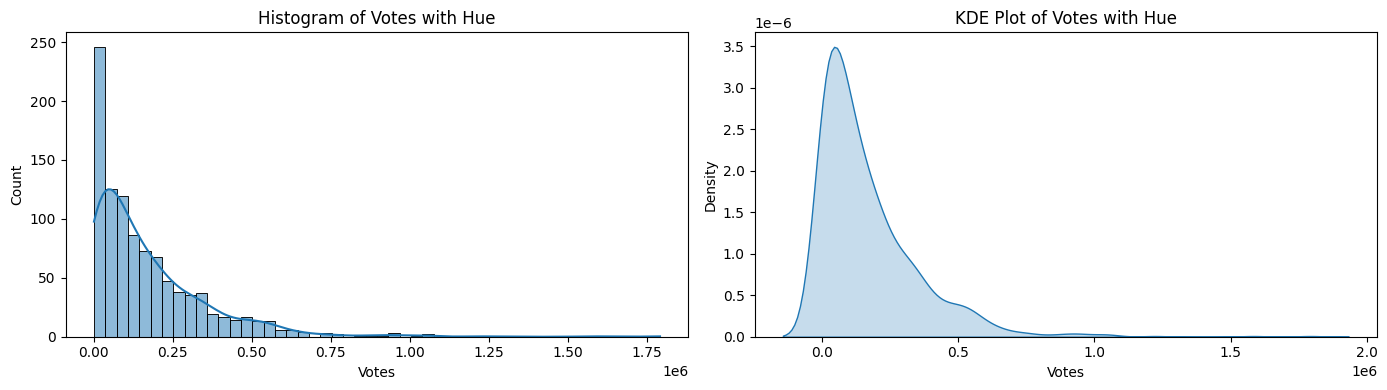

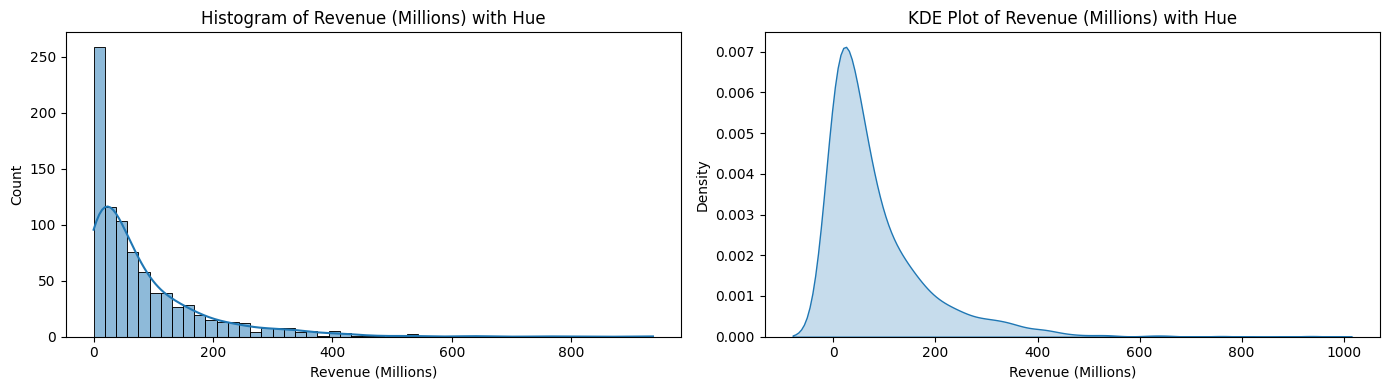

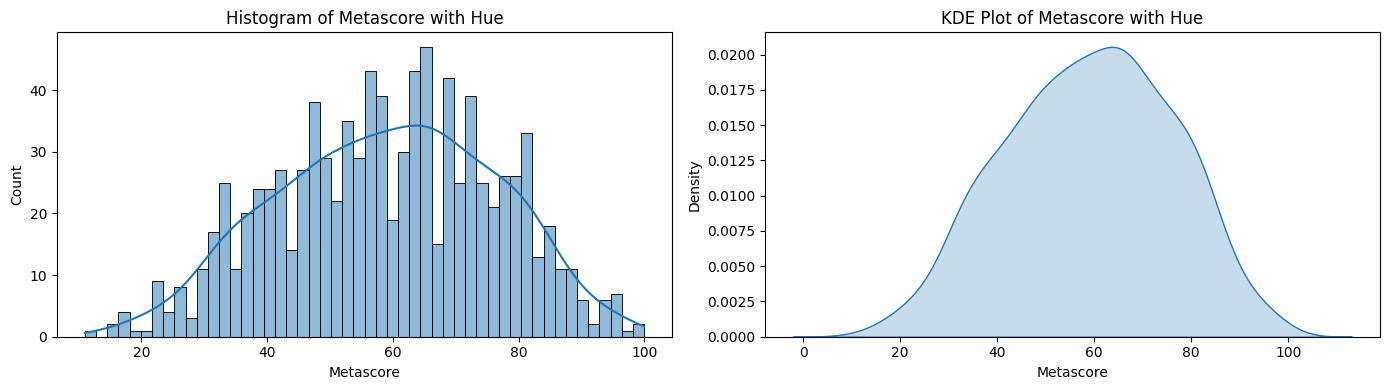

In [ ]:
# @title continous feature disturbutions
def target3_plot(column,train):

      axes = plt.subplots(1, 2, figsize=(14, 4))[1]  # Create subplots with 1 row and 2 columns

      # Plot histogram with hue
      sns.histplot(data=train, x=column, bins=50, kde=True, ax=axes[0])
      axes[0].set_title(f'Histogram of {column} with Hue')
      axes[0].set_xlabel(column)
      axes[0].set_ylabel('Count')

      # Plot KDE plot with hue
      sns.kdeplot(data=train, x=column, shade=True, ax=axes[1])
      axes[1].set_title(f'KDE Plot of {column} with Hue')
      axes[1].set_xlabel(column)
      axes[1].set_ylabel('Density')

      plt.tight_layout()  # Adjust spacing between subplots
      plt.show()
for i in cont:
 target3_plot(i,data)


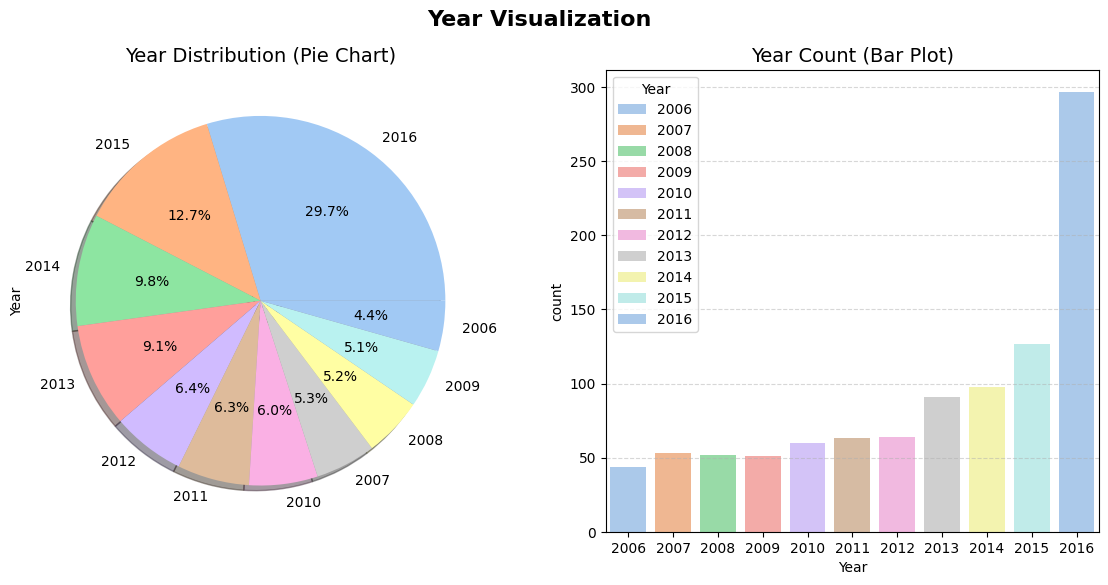

Columns in Target column are: Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64


In [ ]:
# @title category feature disturbutions

def target_plot(column,train):
    custom_palette = sns.color_palette("pastel")
    f, ax = plt.subplots(1, 2, figsize=(14,6))
    train[column].value_counts().plot.pie(autopct='%2.1f%%', ax=ax[0], shadow=True, colors=custom_palette)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)
    ax[0].set_title(f'{column} Distribution (Pie Chart)', fontsize=14)
    ax[1].set_title(f'{column} Count (Bar Plot)', fontsize=14)
    plt.suptitle(f'{column} Visualization', fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    print("Columns in Target column are:",train[column].value_counts())
for i in cat:
 target_plot(i,data)

In [ ]:
# @title top 10 movies overall(based on rating)

data.sort_values('Rating',ascending=False)
data.head(10)

#but here we notice two problems ,

#1.metascore is not high for some movies, so  to find good movies we might need to find movies with high score in of both

#2. the rating also depend on the votes for movies with very less voting might be biased

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,temp
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,7.133333,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"[Action, Adventure, Sci-Fi]"
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",6.850000,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"[Adventure, Mystery, Sci-Fi]"
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,5.533333,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"[Horror, Thriller]"
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",7.200000,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,"[Animation, Comedy, Family]"
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,7.166667,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,"[Action, Adventure, Fantasy]"
5,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,6.100000,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,"[Action, Adventure, Fantasy]"
6,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,8.400000,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,"[Comedy, Drama, Music]"
8,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",7.100000,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,"[Action, Adventure, Biography]"
9,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,7.550000,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,"[Adventure, Drama, Romance]"
10,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,7.433333,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,"[Adventure, Family, Fantasy]"


In [ ]:
# @title top 10 movies overall(based on rating and metascore)

data['m']=data['Metascore']/10

data['combined rating']=data[['Rating','m']].mean(axis=1)

data.sort_values('combined rating',ascending=False).head(10)

#here i created a new variable which give max of two scores and sorted using that.

#this is not the only method like for example you could try to find average of both or
#if you think that people are most likely to give high score than low score, the you could find min of both or
# you could even combine all this method and find the film that always comes up top or relatively top list.


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genres,m,combined rating
230,231,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.62,98.0,"[Drama, Fantasy, War]",9.8,9.00
656,657,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,100.0,[Drama],10.0,8.95
111,112,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,96.0,"[Biography, Drama, History]",9.6,8.85
489,490,Ratatouille,"Animation,Comedy,Family",A rat who can cook makes an unusual alliance w...,Brad Bird,"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",2007,111,8.0,504039,206.44,96.0,"[Animation, Comedy, Family]",9.6,8.80
241,242,Inside Out,"Animation,Adventure,Comedy",After young Riley is uprooted from her Midwest...,Pete Docter,"Amy Poehler, Bill Hader, Lewis Black, Mindy Ka...",2015,95,8.2,416689,356.45,94.0,"[Animation, Adventure, Comedy]",9.4,8.80
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN,"[Action, Biography, Drama]",NaN,8.80
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,"[Comedy, Drama, Music]",9.3,8.80
688,689,Toy Story 3,"Animation,Adventure,Comedy",The toys are mistakenly delivered to a day-car...,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty",2010,103,8.3,586669,414.98,92.0,"[Animation, Adventure, Comedy]",9.2,8.75
21,22,Manchester by the Sea,Drama,A depressed uncle is asked to take care of his...,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,7.9,134213,47.70,96.0,[Drama],9.6,8.75
41,42,Moonlight,Drama,"A chronicle of the childhood, adolescence and ...",Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",2016,111,7.5,135095,27.85,99.0,[Drama],9.9,8.70


In [ ]:
# @title top 10 movies overall(based on rating and metascore and votes)

# Mean rating across all movies
C = data['Rating'].mean()

# Minimum number of votes required to be considered
m = data['Votes'].quantile(0.70)

# Function to compute weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['Votes']
    R = x['combined rating']
    return (v / (v + m) * R) + (m / (v + m) * C)

# Apply the function to compute weighted rating
data['Weighted Rating'] = data.apply(weighted_rating, axis=1)

# Sort movies based on weighted rating
data.sort_values(by='Weighted Rating', ascending=False).head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genres,m,combined rating,Weighted Rating
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,"[Action, Crime, Drama]",8.2,8.60,8.409011
230,231,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.62,98.0,"[Drama, Fantasy, War]",9.8,9.00,8.341473
688,689,Toy Story 3,"Animation,Adventure,Comedy",The toys are mistakenly delivered to a day-car...,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty",2010,103,8.3,586669,414.98,92.0,"[Animation, Adventure, Comedy]",9.2,8.75,8.228952
111,112,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,96.0,"[Biography, Drama, History]",9.6,8.85,8.223667
509,510,Gravity,"Drama,Sci-Fi,Thriller",Two astronauts work together to survive after ...,Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,7.8,622089,274.08,96.0,"[Drama, Sci-Fi, Thriller]",9.6,8.70,8.213622
489,490,Ratatouille,"Animation,Comedy,Family",A rat who can cook makes an unusual alliance w...,Brad Bird,"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",2007,111,8.0,504039,206.44,96.0,"[Animation, Comedy, Family]",9.6,8.80,8.203703
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0,"[Crime, Drama, Thriller]",8.5,8.50,8.183707
136,137,No Country for Old Men,"Crime,Drama,Thriller",Violence and mayhem ensue after a hunter stumb...,Ethan Coen,"Tommy Lee Jones, Javier Bardem, Josh Brolin, W...",2007,122,8.1,660286,74.27,91.0,"[Crime, Drama, Thriller]",9.1,8.60,8.158658
499,500,Up,"Animation,Adventure,Comedy",Seventy-eight year old Carl Fredricksen travel...,Pete Docter,"Edward Asner, Jordan Nagai, John Ratzenberger,...",2009,96,8.3,722203,292.98,88.0,"[Animation, Adventure, Comedy]",8.8,8.55,8.149164
241,242,Inside Out,"Animation,Adventure,Comedy",After young Riley is uprooted from her Midwest...,Pete Docter,"Amy Poehler, Bill Hader, Lewis Black, Mindy Ka...",2015,95,8.2,416689,356.45,94.0,"[Animation, Adventure, Comedy]",9.4,8.80,8.119652


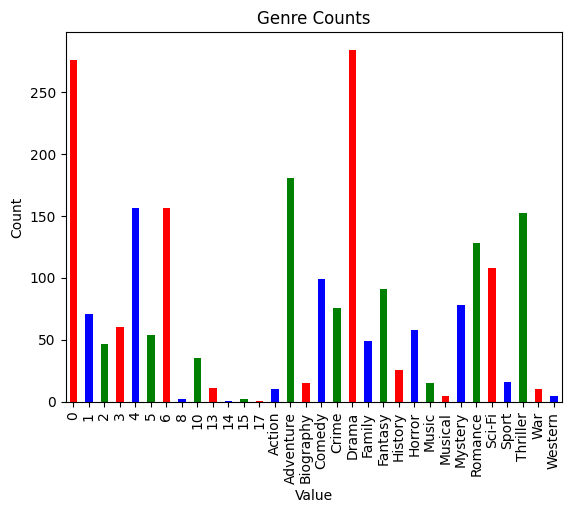

In [ ]:
# @title finding top 10 movies based on different categories (generalized)

#here i try to generalize what we find and apply based on different user needs
i=[]

i=input("enter the genres you want: ").split(',')

j=input('enter the category based on you want to sort: ')

# finding movies in comedy genre
new =data[data['Genre'].str.contains('|'.join(i),case=False)].sort_values(j.title(),ascending=False)
new.head(10)

#you could type in multiple genres upto 3 values and can be sorted using diffrent types of rating

In [ ]:
# @title creating multiple columns for gen

# Split the 'Genre' column into multiple columns based on the comma delimiter
# and concatenate these new columns back to the original DataFrame
data = pd.concat((data, data['Genre'].str.split(",", expand=True)), axis=1)

# Rename the newly created columns after splitting
data = data.rename(columns={0: "Genre 1", 1: "Genre 2", 2: "Genre 3"})


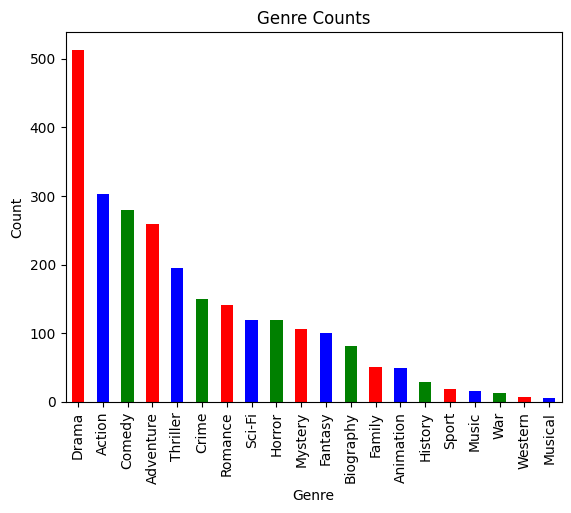

In [ ]:
list1=[]
for value in data['Genre']:
    list1.append(value.split(','))
data['temp']=list1
expanded_genres = data

expanded_genres = expanded_genres['temp'].explode()
# Calculate value counts for each genre
combined_counts = expanded_genres.value_counts()

# Plot the combined value counts
combined_counts.plot(kind="bar", color=["r", "b", "g"])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.show()

In [ ]:
g = ['Genre 1',"Genre 2" , "Genre 3"]

# data=data.sort_values(='Weighted Rating', ascending=False)
combined_counts = pd.Series(dtype=int)

# Calculate value counts for each genre and add them to the combined_counts Series
for genre in g:
    genre_counts = data[genre].value_counts()
    combined_counts = combined_counts.add(genre_counts, fill_value=0)

# Plot the combined value counts
combined_counts.plot(kind="bar", color=c)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.show()
#we see that most popular genre is drama but that can be biased  so what we could do is take top 100 movies and find out there genre

KeyError: 'Genre 1'

In [ ]:
# @title best director in each genre(based on Rating)
list1=[]
for value in data['Genre']:
    list1.append(value.split(','))
data['Genres']=list1


# Group by Genre and Director, then sum the Revenue
gd = data.explode('Genres').groupby(['Genres', 'Director'])['Weighted Rating'].mean().reset_index()

# Find the top directors for each genre based on Revenue
top = gd.groupby('Genres').apply(lambda x: x.nlargest(3, 'Weighted Rating'))

display(pd.DataFrame(top).head(5))


Genres           Director  Weighted Rating
Genres                                                      
Action    70      Action      George Miller         8.106311
          33      Action  Christopher Nolan         8.099799
          84      Action      James Cameron         7.813397
Adventure 310  Adventure        Lee Unkrich         8.228952
          339  Adventure        Pete Docter         8.134408

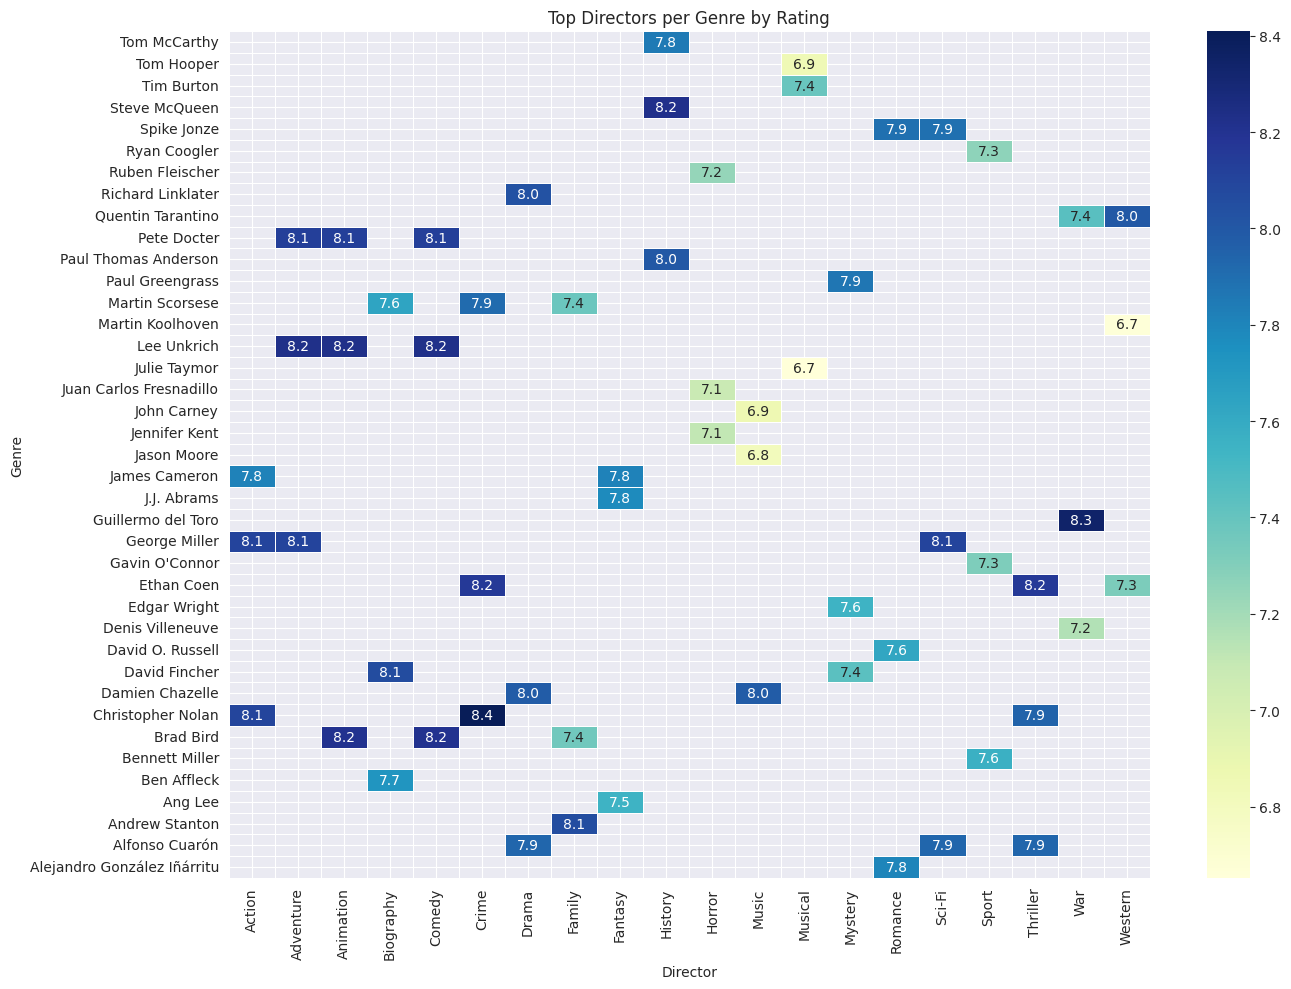

In [ ]:
pivot_data = top.pivot(index='Genres', columns='Director', values='Weighted Rating')

# Option 1: Plot as Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_data.T, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5).invert_yaxis()

# Customize the plot
plt.title('Top Directors per Genre by Rating')
plt.xlabel('Director')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Option 2: Plot as Bar Plot
# Melt the pivot table to long format for bar plotting
melted_data = pivot_data.reset_index().melt(id_vars='Genres', var_name='Director', value_name='Weighted Rating')

# Plot the data as bar plot
# plt.figure(figsize=(14, 10))
# sns.displot(data=melted_data, x='Weighted Rating', y='Genres', hue='Director')

# # Customize the plot
# plt.title('Top Directors per Genre by Rating')
# plt.xlabel('Weighted Rating')
# plt.ylabel('Genre')
# plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


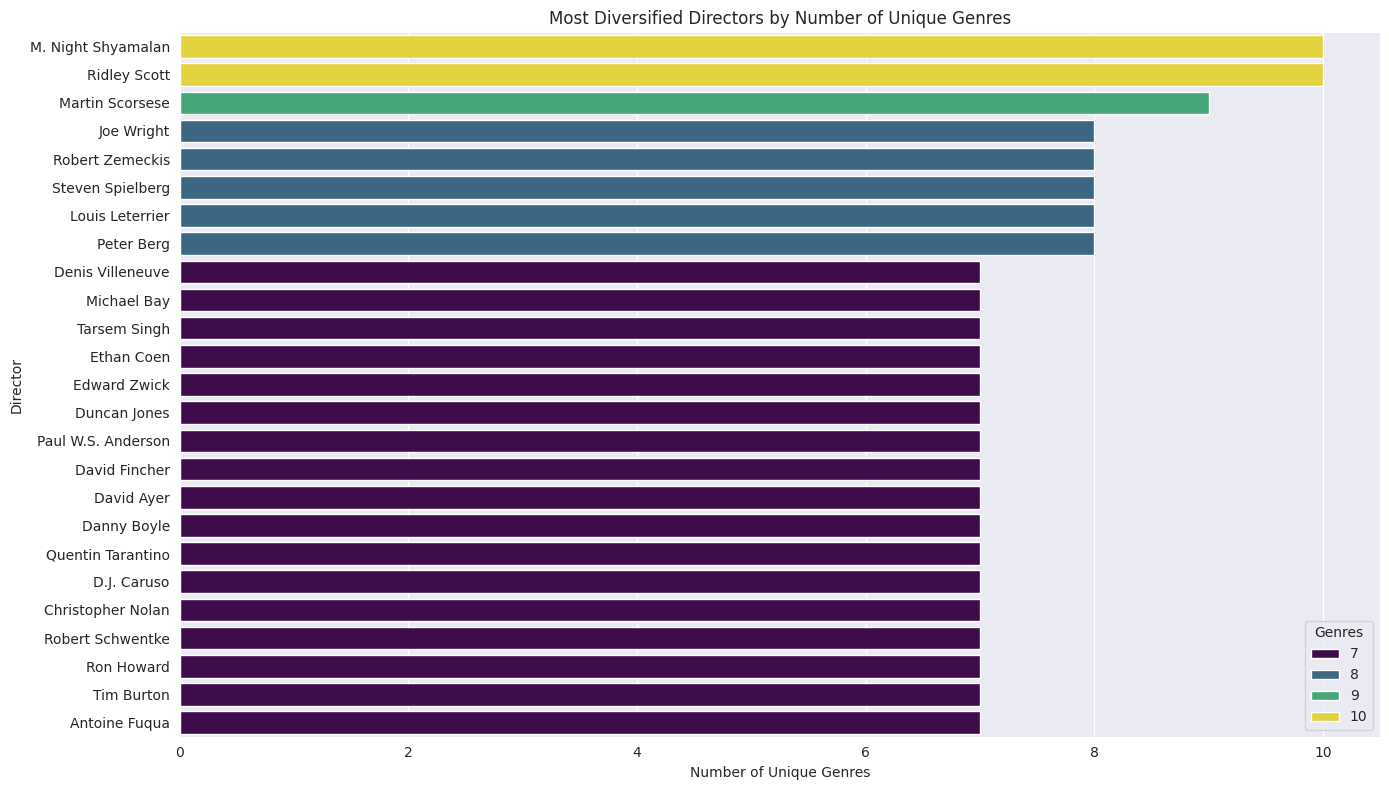

In [ ]:
counts = data.explode('Genres').groupby('Director')['Genres'].nunique().reset_index()


# Sort directors by the number of unique genres in descending order
directors =counts.sort_values(by='Genres', ascending=False).head(25)

# # Display the most diversified directors
# print("Most Diversified Directors:")
# print(directors)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=directors, x='Genres', y='Director',hue='Genres', palette='viridis')

# Customize the plot
plt.title('Most Diversified Directors by Number of Unique Genres')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

In [ ]:
g = ['Genre 1',"Genre 2" , "Genre 3"]
c = ["r","b","g"]
# data=data.sort_values(='Weighted Rating', ascending=False)
combined_counts1 = pd.Series()

# Calculate value counts for each genre and add them to the combined_counts Series
for genre in g:
    genre_counts1 = data[data['Weighted Rating']>=6][genre].value_counts()
    combined_counts1 = combined_counts1.add(genre_counts, fill_value=0)

# Plot the combined value counts
combined_counts1.plot(kind="bar", color=c)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.show()
#we see that most popular genre is drama but that can be biased  so what we could do is take top 100 movies and find out there genre

KeyError: 'Weighted Rating'

In [ ]:
# data = pd.concat((data, data['Actors'].str.split(",", expand = True )) , axis = 1)
# #Rename Columns after pslitting
# data = data.rename(columns = { 0:"cast 1",1:"cast 2" , 2: "cast 3",3:"cast 4"})

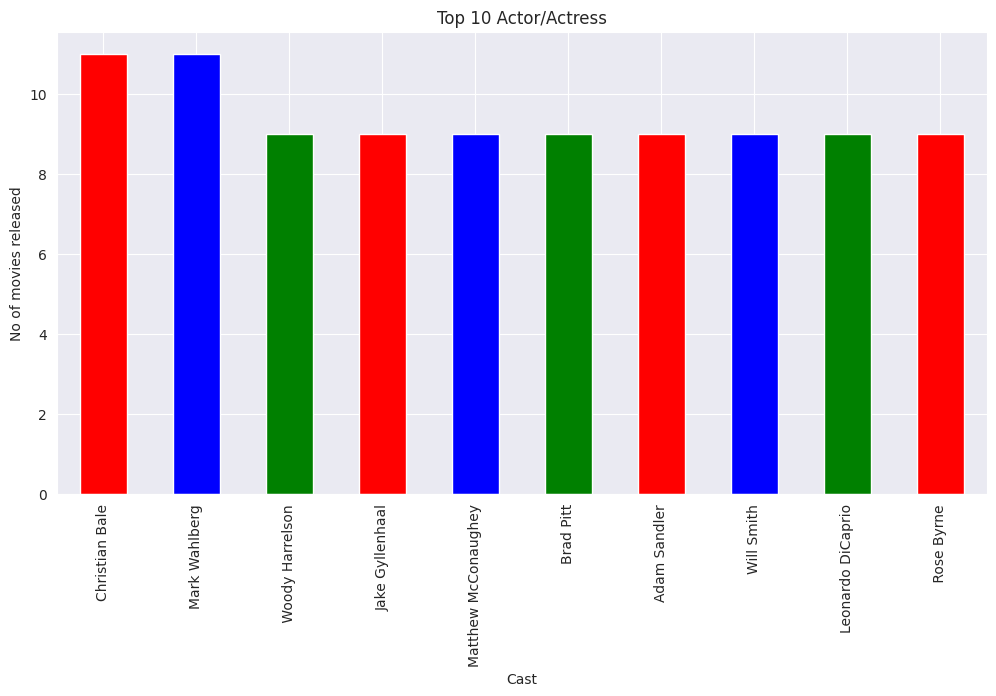

In [ ]:
from collections import Countehttps://stackoverflow.com/questions/71809386/normalize-scale-dataframe-in-a-certain-ranger
Cast = []
casts=[]
c = ["r","b","g"]
for i in data['Actors']:
    if type(i) == str:
        casts.append(i.split(','))
        for x in i.split(','):
            Cast.append(x)
data['casts']=casts
dicCastWithCounts = Counter(Cast)
df_Cast=pd.DataFrame(data={'Cast':list(dicCastWithCounts.keys()),'Count':list(dicCastWithCounts.values())}).sort_values(by='Count',ascending=False)
df_Cast.index = df_Cast.Cast
df_Cast.Count.head(10).plot.bar(figsize=(12,6),color=c)
plt.title("Top 10 Actor/Actress")
plt.xlabel("Cast")
plt.ylabel("No of movies released")
plt.show()

Most Diversified Actors:
                    Actor  Unique Genre Count
1927      Jake Gyllenhaal                  12
1991          Johnny Depp                  12
574          Hugh Jackman                  12
1319           Rose Byrne                  11
2108        Mark Wahlberg                  11
1095    Michelle Monaghan                  11
110         Anne Hathaway                  11
309        Cillian Murphy                  11
1970      Jesse Eisenberg                  11
2347            Tom Hanks                  11
731         Joel Edgerton                  11
2380           Will Smith                  11
945        Liev Schreiber                  11
1780     Daniel Radcliffe                  10
1010         Mark Ruffalo                  10
2117  Matthew McConaughey                  10
399          Diane Kruger                  10
1697            Brad Pitt                  10
1317        Rosamund Pike                  10
1747       Christian Bale                  10
1572     

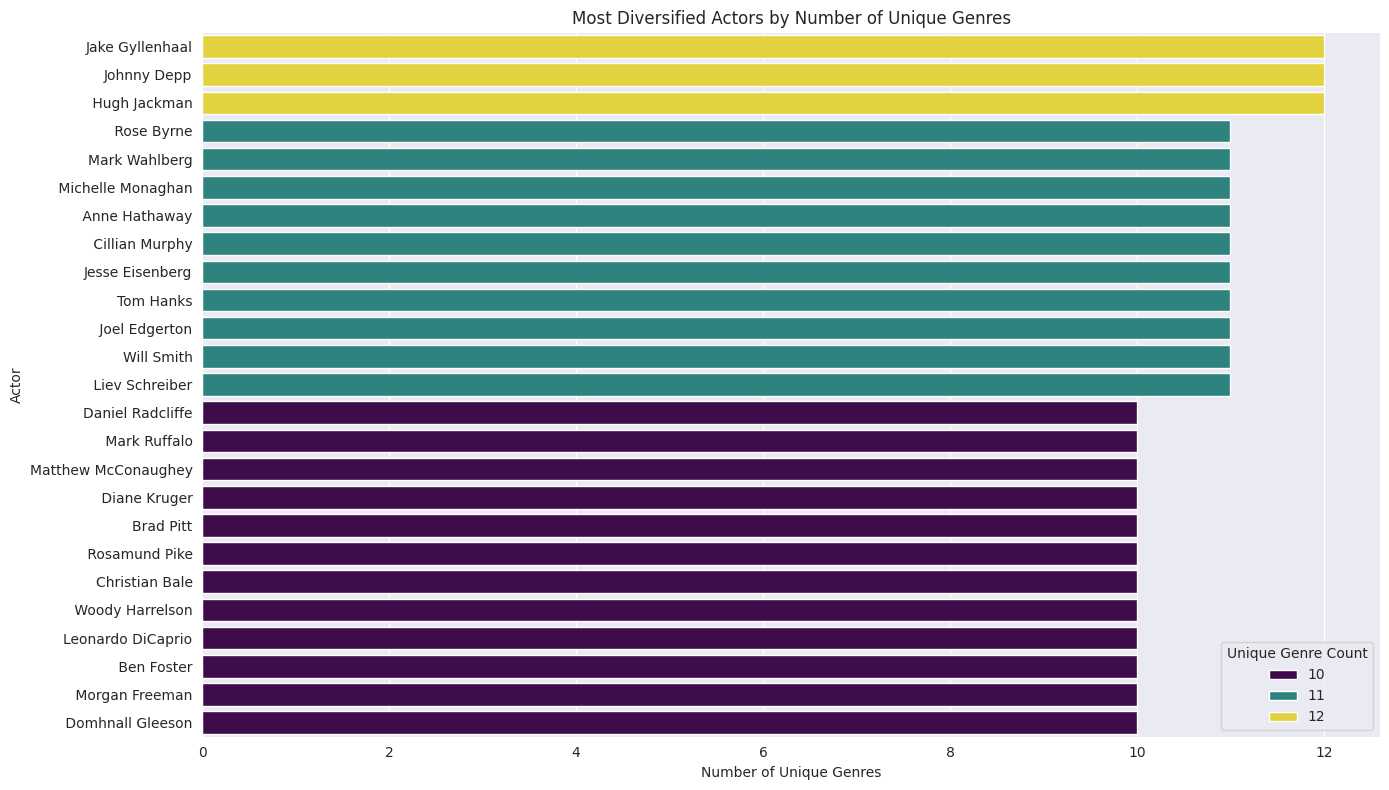

In [ ]:
data_exploded = data.explode('Genres').explode('casts')

# Count the number of unique genres each actor has appeared in
actor_genre_counts = data_exploded.groupby('casts')['Genres'].nunique().reset_index()

# Rename the columns for clarity
actor_genre_counts.columns = ['Actor', 'Unique Genre Count']

# Sort actors by the number of unique genres in descending order
most_diversified_actors = actor_genre_counts.sort_values(by='Unique Genre Count', ascending=False).head(25)

# Display the most diversified actors
print("Most Diversified Actors:")
print(most_diversified_actors)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=most_diversified_actors, x='Unique Genre Count', y='Actor',hue='Unique Genre Count', palette='viridis')

# Customize the plot
plt.title('Most Diversified Actors by Number of Unique Genres')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


Rising Actors:
Year                casts  Growth
0        Charlotte Le Bon     4.0
1              Theo James     4.0
2              Ben Foster     4.0
3            J.K. Simmons     4.0
4            Jamie Dornan     3.0
5         Gugu Mbatha-Raw     3.0
6             Zoey Deutch     3.0
7          Felicity Jones     3.0
8     Matthew McConaughey     3.0
9             Ben Affleck     3.0
10        Kate Beckinsale     3.0
11           Kristen Wiig     3.0
12           Laura Linney     3.0
13          Aaron Eckhart     3.0
14             Diego Luna     3.0
15            Mark Strong     3.0
16          Haley Bennett     3.0
17             Chris Pine     3.0
18          Anna Kendrick     3.0
19           Andrew Scott     3.0
20          Xavier Samuel     2.0
21         Gemma Arterton     2.0
22           Aubrey Plaza     2.0
23         Sharlto Copley     2.0
24             Seth Rogen     2.0


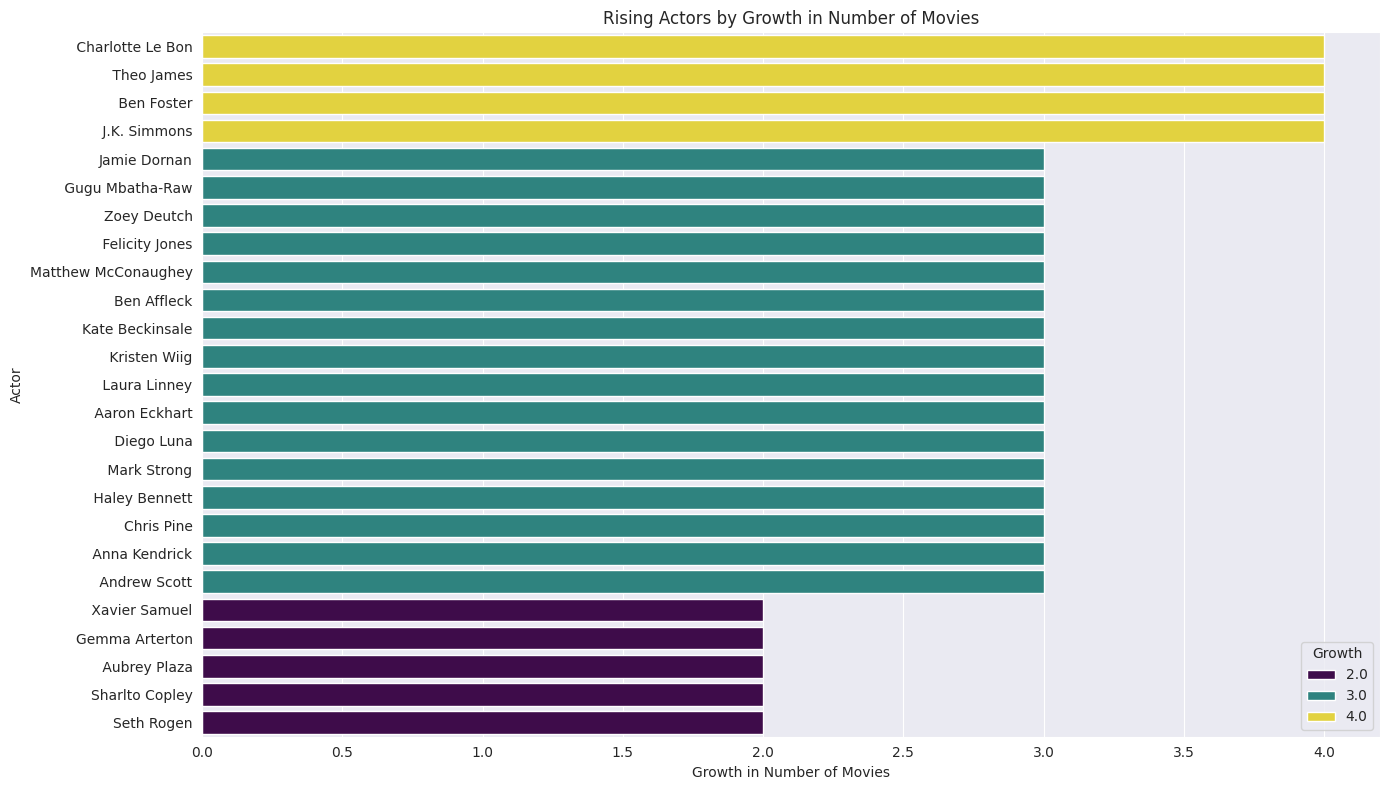

In [ ]:
data_exploded = data.explode('casts')

# Count the number of movies each actor appeared in each year
actor_movie_counts = data_exploded.groupby(['Year', 'casts']).size().reset_index(name='Movie Count')

# Pivot the table to have years as columns
actor_movie_counts_pivot = actor_movie_counts.pivot(index='casts', columns='Year', values='Movie Count').fillna(0)

# Calculate the growth (difference) in the number of movies each actor appeared in
actor_movie_counts_pivot['Growth'] = actor_movie_counts_pivot.iloc[:, -1] - actor_movie_counts_pivot.iloc[:, 0]

# Sort actors by the growth in the number of movies in descending order
rising_actors = actor_movie_counts_pivot.sort_values(by='Growth', ascending=False).reset_index().head(25)

# # Display the rising actors
# print("Rising Actors:")
# print(rising_actors[['casts', 'Growth']])

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=rising_actors, x='Growth', y='casts',hue='Growth', palette='viridis')

# Customize the plot
plt.title('Rising Actors by Growth in Number of Movies')
plt.xlabel('Growth in Number of Movies')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

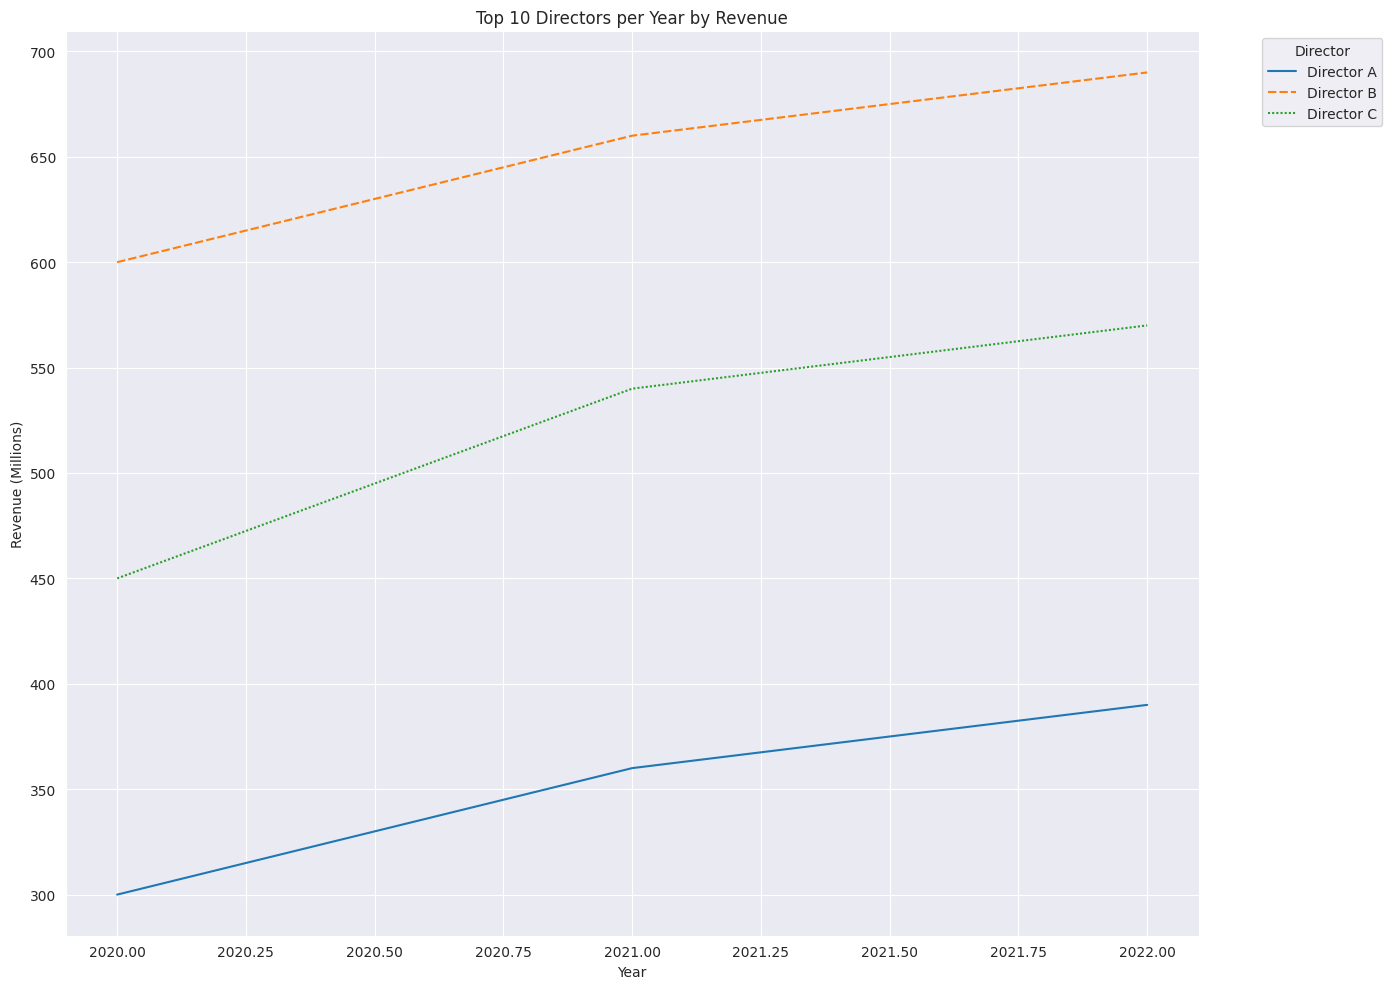

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation for demonstration (You would use your actual data here)

# Group by Year and Director, then sum the Revenue
director_revenue_per_year = data.groupby(['Year', 'Director'])['Revenue (Millions)'].sum().reset_index()

# Find the top 10 directors per year based on Revenue
top_directors_per_year = director_revenue_per_year.groupby('Year').apply(lambda x: x.nlargest(10, 'Revenue (Millions)')).reset_index(drop=True)

# Get a list of all unique top directors across all years
top_directors = top_directors_per_year['Director'].unique()

# Create a comprehensive DataFrame with all years and all top directors
years = top_directors_per_year['Year'].unique()
full_index = pd.MultiIndex.from_product([years, top_directors], names=['Year', 'Director'])
comprehensive_df = pd.DataFrame(index=full_index).reset_index()

# Merge the comprehensive DataFrame with the top directors per year data
comprehensive_df = comprehensive_df.merge(top_directors_per_year, on=['Year', 'Director'], how='left')

# Fill missing revenue data with 0
comprehensive_df['Revenue (Millions)'] = comprehensive_df['Revenue (Millions)'].fillna(0)

# Create a pivot table for plotting
pivot_data = comprehensive_df.pivot(index='Year', columns='Director', values='Revenue (Millions)')

# Plot the data
plt.figure(figsize=(14, 10))
sns.lineplot(data=pivot_data)

# Customize the plot
plt.title('Top 10 Directors per Year by Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

d=pd.DataFrame()
for  i, genre in enumerate(g) :
    d[i]=data[data['Weighted Rating']>=7.5][genre].value_counts()

d.transpose().sum().plot(kind = "bar" , color =c)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

KeyError: 'Weighted Rating'

In [ ]:
# @title updating null values

# replacing null values of metascore with rating of that film
data['Metascore']=data['Metascore'].fillna(data['Rating'])

#spliting the data into two one without null values and one with null values

nf = data[data['Revenue (Millions)'].isnull()].drop(['Rank','Revenue (Millions)'],axis=1)
data= data[data['Revenue (Millions)'].notnull()].drop('Rank',axis=1)
# nf=nf.select_dtypes(exclude=['object'])



In [ ]:
#one of the prblm associated with this is
#most of the imp data are text
#which also is loose in a sense that they dont have any fixed domain or fixed value , directors ,genre , actors can take different value,
#so how do you compute this ?

#1. one thing we can be sure that genre can be only 3 means there are only three genres , so we can easily turn them into numerical
#but the prblm there is ot order for genre ,ie,all genres are important there is no first secod or third

# 2. directors are super clear you could easily code them into numerical and
# could specify if the director is unkonwn we could assign them a number
# probably 0 one of the prblem with this is that no 1 is not lesser than no 2
# maybe you could use rating and calculate a number with that. than going
# random. but even so rating can be biased some time and even if then the rating
# are not uniformaly distributed,they dont count fact that there previous films
# where hit then current films flopped and curreent film are hit but previous
# films where flop and adding values like that create data likage that is
# features are not independt from each other %% %%

#3. for actors may be we could try to take only first 3 actors or something or what we call main characters
#buut can be pretty biased since no of main cahr can be different fore each film

In [ ]:


Data=data.copy()

In [ ]:
for i in data[~data['cast 4'].isin(Cast)]:
  for x in i.split(','):
              Cast.append(x)
Cast.append('None')

KeyError: 'cast 4'

In [ ]:
l=combined_counts.index.tolist()
l.append('None')

In [ ]:
print(Cast)

['Chris Pratt', ' Vin Diesel', ' Bradley Cooper', ' Zoe Saldana', 'Noomi Rapace', ' Logan Marshall-Green', ' Michael Fassbender', ' Charlize Theron', 'James McAvoy', ' Anya Taylor-Joy', ' Haley Lu Richardson', ' Jessica Sula', 'Matthew McConaughey', 'Reese Witherspoon', ' Seth MacFarlane', ' Scarlett Johansson', 'Will Smith', ' Jared Leto', ' Margot Robbie', ' Viola Davis', 'Matt Damon', ' Tian Jing', ' Willem Dafoe', ' Andy Lau', 'Ryan Gosling', ' Emma Stone', ' Rosemarie DeWitt', ' J.K. Simmons', 'Essie Davis', ' Andrea Riseborough', ' Julian Barratt', 'Kenneth Branagh', 'Charlie Hunnam', ' Robert Pattinson', ' Sienna Miller', ' Tom Holland', 'Jennifer Lawrence', ' Chris Pratt', ' Michael Sheen', 'Laurence Fishburne', 'Eddie Redmayne', ' Katherine Waterston', ' Alison Sudol', 'Dan Fogler', 'Taraji P. Henson', ' Octavia Spencer', ' Janelle Monáe', 'Kevin Costner', 'Felicity Jones', ' Diego Luna', ' Alan Tudyk', ' Donnie Yen', "Auli'i Cravalho", ' Dwayne Johnson', ' Rachel House', ' Te

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Data["Director"] = le.fit_transform(Data["Director"])
# Transform the genre columns using the fitted LabelEncoder
# le.fit(l)
# Data['Genre 1'] = le.transform(Data['Genre 1'])
# Data['Genre 2'] = le.transform(Data['Genre 2'])
# Data['Genre 3'] = le.transform(Data['Genre 3'])
# le.fit(Cast)
# Data['cast 1'] = le.transform(Data['cast 1'])
# Data['cast 2'] = le.transform(Data['cast 2'])
# Data['cast 3'] = le.transform(Data['cast 3'])
# Data['cast 4'] = le.transform(Data['cast 4'])

In [ ]:
data_expanded = Data.explode('temp')

# Perform one-hot encoding on the expanded DataFrame
one_hot_encoded_genres = pd.get_dummies(data_expanded['temp'])

# Aggregate the one-hot encoded columns back to the original DataFrame
Data= data_expanded.drop(columns=['temp']).join(one_hot_encoded_genres).groupby(level=0).max()


In [ ]:
data_expanded = Data.explode('temp2')

# Perform one-hot encoding on the expanded DataFrame
one_hot_encoded_genres = pd.get_dummies(data_expanded['temp2'])

# Aggregate the one-hot encoded columns back to the original DataFrame
Data= data_expanded.join(one_hot_encoded_genres).groupby(level=0).max()


In [ ]:
display(Data)


,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,212,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,...,False,False,False,False,False,True,False,False,False,False
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",430,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,...,False,False,False,True,False,True,False,False,False,False
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,324,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,...,True,False,False,False,False,False,False,True,False,False
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",87,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,...,False,False,False,False,False,False,False,False,False,False
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,112,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,402,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,...,True,False,False,False,False,False,False,False,False,False
994,Project X,Comedy,3 high school seniors throw a birthday party t...,382,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,...,False,False,False,False,False,False,False,False,False,False
996,Hostel: Part II,Horror,Three American college students studying abroa...,146,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,...,True,False,False,False,False,False,False,False,False,False
997,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,264,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
corr()

In [ ]:
display(Data)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),...,Winona Ryder,Woody Allen,Xavier Samuel,Yoo Gong,Zac Efron,Zach Galifianakis,Zachary Gordon,Zachary Quinto,Zoey Deutch,Zooey Deschanel
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,7.133333,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,...,False,False,False,False,False,False,False,False,False,False
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",6.850000,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,...,False,False,False,False,False,False,False,False,False,False
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,5.533333,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,...,False,False,False,False,False,False,False,False,False,False
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",7.200000,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,...,False,False,False,False,False,False,False,False,False,False
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,7.166667,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,5.766667,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,...,False,False,False,False,False,False,False,False,False,False
994,Project X,Comedy,3 high school seniors throw a birthday party t...,6.700000,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,...,False,False,False,False,False,False,False,False,False,False
996,Hostel: Part II,Horror,Three American college students studying abroa...,5.266667,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,...,False,False,False,False,False,False,False,False,False,False
997,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,6.166667,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
describe(Data.dropna(inplace=True))

AttributeError: 'NoneType' object has no attribute 'dtypes'

In [ ]:
from sklearn.model_selection import train_test_split

y = Data['Revenue (Millions)']
#y = pd.qcut(Data['Revenue (Millions)'], q=3, labels=[0,1,2])

x=Data.drop('Revenue (Millions)',axis=1).select_dtypes(exclude=['object']).drop(['m','Weighted Rating','combined rating'],axis=1)

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,shuffle=True)



from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)

model.fit(xtr,ytr)

model.score(xte,yte)
model.predict(nf)
# data.loc[nf.index,'Revenue (Millions)']=pre

0.6674589524920289

In [ ]:
model.predict(nf.select_dtypes(exclude=['object']))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
-  50 Cent
-  AJ Michalka
-  Aamir Khan
-  Aaron Burns
-  Aaron Eckhart
- ...


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.9 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import optuna

def create(trial):
  params = {
          "min_child_weight":trial.suggest_int('min_child_weight',1,5),
          "max_depth": trial.suggest_int("max_depth", 5, 10),
          "gamma":trial.suggest_float('gamma',0,0.5),
          "learning_rate": trial.suggest_float("learning_rate", 1e-2, 0.2, log=True),
          "subsample": trial.suggest_float("subsample", 0.5, 1.0),
          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
          "reg_alpha":trial.suggest_float('reg_alpha',0 ,5),
      }
  return params



model=XGBClassifier(
     learning_rate =0.1, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=0,
 objective= 'multi: softmax')

def objective(trial):


    params=create(trial)
    model.set_params(**params)
    model.fit(xtr, ytr)
    predictions = model.predict(xte)
    # cross = cross_val_score(model, xtr,ytr, n_jobs=-1).mean()
    # acc = accuracy_score(yte, predictions, normalize=True)
    rmse = -mean_squared_error(yte, predictions)
    return rmse

optuna.logging.set_verbosity(optuna.logging.INFO)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

#print('Best hyperparameters:', study.best_params)
#print('Best RMSE:', study.best_value)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-07-29 13:55:13,694] A new study created in memory with name: no-name-06c5cd25-af2f-4c9d-b589-d06b2b397625
[I 2024-07-29 13:55:19,377] Trial 0 finished with value: -0.49714285714285716 and parameters: {'min_child_weight': 4, 'max_depth': 5, 'gamma': 0.30715385523932226, 'learning_rate': 0.05648660362974359, 'subsample': 0.5768664471906364, 'colsample_bytree': 0.9952429993045131, 'reg_alpha': 3.4514271182170173}. Best is trial 0 with value: -0.49714285714285716.
[I 2024-07-29 13:55:23,556] Trial 1 finished with value: -0.4114285714285714 and parameters: {'min_child_weight': 2, 'max_depth': 9, 'gamma': 0.34459967888299264, 'learning_rate': 0.07972950851434757, 'subsample': 0.8432122444636463, 'colsample_bytree': 0.5082531806046691, 'reg_alpha': 1.0631119595018712}. Best is trial 1 with value: -0.4114285714285714.
[I 2024-07-29 13:55:28,073] Trial 2 finished with value: -0.5542857142857143 and parameters: {'min_child_weight': 5, 'max_depth': 7, 'gamma': 0.37354456938813524, 'learni

Number of finished trials: 10
Best trial:
  Value: -0.4114285714285714
  Params: 
    min_child_weight: 2
    max_depth: 9
    gamma: 0.34459967888299264
    learning_rate: 0.07972950851434757
    subsample: 0.8432122444636463
    colsample_bytree: 0.5082531806046691
    reg_alpha: 1.0631119595018712


In [ ]:
model=XGBClassifier( **study.best_params)

model.fit(xtr,ytr)
model.score(xte,yte)

0.6571428571428571

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(200, 100))  # Adjusted figure size
plot_tree(model, ax=ax, feature_names=xtr.columns)


<Axes: >

Error in callback <function _draw_all_if_interactive at 0x7ad8a0364ee0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ad8a0364160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib

clf = tree.DecisionTreeClassifier()
clf.fit(xtr, ytr)

fig, ax = plt.subplots(figsize=(200, 100))  # Adjusted figure size
tree.plot_tree(clf, ax=ax, feature_names=xtr.columns)

def replace_text(obj):
    if isinstance(obj, matplotlib.text.Annotation):
        txt = obj.get_text()
        _lines = txt.splitlines()
        print(f"Annotation text lines: {_lines}")  # Debugging information

        value_index = None
        class_index = None
        for i, _line in enumerate(_lines):
            if "value" in _line:
                value_index = i
            if "class" in _line:
                class_index = i
        print(f"value_index: {value_index}, class_index: {class_index}")  # Debugging information

        # Check if the indices were found
        if value_index is None or class_index is None:
            return obj  # Skip modification if either index is not found

        _result = _lines[:value_index] + _lines[class_index:]
        obj.set_text("\n".join(_result))
    return obj

ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y.value_counts()

Revenue (Millions)
Low       291
High      291
Medium    290
Name: count, dtype: int64

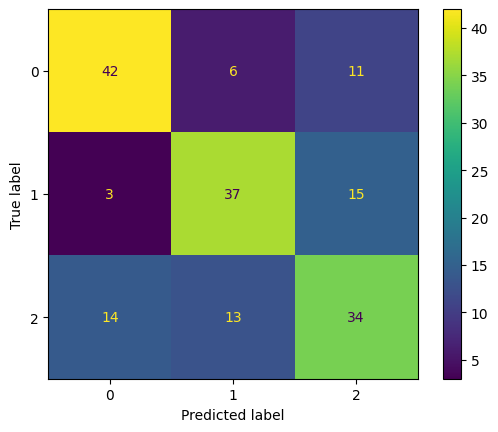

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(yte,model.predict(xte))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
#finding some patterns such as :
# revenu

In [ ]:
#using nlp ,sementation ,